In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from qiskit_metal import draw, Dict, designs, MetalGUI
from qiskit_metal.toolbox_metal import math_and_overrides
from qiskit_metal.qlibrary.core import QComponent
import qiskit_metal as metal

from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond
from qiskit_metal.qlibrary.terminations.short_to_ground import ShortToGround
from qiskit_metal.qlibrary.tlines.straight_path import RouteStraight
from qiskit_metal.qlibrary.tlines.anchored_path import RouteAnchors
from qiskit_metal.qlibrary.tlines.mixed_path import RouteMixed
from qiskit_metal.qlibrary.qubits.transmon_cross import TransmonCross
from JJ_in_res import JJinRes
from qiskit_metal.qlibrary.tlines.meandered import RouteMeander
from qiskit_metal.qlibrary.terminations.open_to_ground import OpenToGround
from qiskit_metal.qlibrary.couplers.coupled_line_tee import CoupledLineTee
from qiskit_metal.qlibrary.couplers.cap_n_interdigital_tee import CapNInterdigitalTee
from inline_n_interdigital import InlineFinger
from qiskit_metal.qlibrary.couplers.line_tee import LineTee

from collections import OrderedDict

import numpy as np

In [3]:
design = metal.designs.design_planar.DesignPlanar()
gui = metal.MetalGUI(design)
design.overwrite_enabled = True

cpw_width = "30um"
cpw_gap = "15um"

In [4]:
# options = Dict(
#     orientation = -90,
#     pos_y = 2.5 - 0.3,
#     trace_width = cpw_width,
#     trace_gap = cpw_gap
# )
# wb1 = LaunchpadWirebond(design, 'wb_top', options=options)

# options = Dict(
#     orientation = 90,
#     pos_y = -2.5 + 0.3,
#     trace_width = cpw_width,
#     trace_gap = cpw_gap
# )
# wb2 = LaunchpadWirebond(design, 'wb_bottom', options=options)

# options = Dict(
#     pin_inputs = Dict(
#         start_pin = Dict(component = "wb_top", pin = "tie"),
#         end_pin = Dict(component = "wb_bottom", pin = "tie")
#     ),
#     trace_width = cpw_width,
#     trace_gap = cpw_gap
# )
# feedline = RouteStraight(design, 'feedline', options=options)

In [5]:
# options = Dict(
#     orientation = "90",
#     open_termination = True,
#     coupling_length = "500um",
#     prime_width = cpw_width,
#     prime_gap = cpw_gap,
#     second_width = cpw_width,
#     second_gap = cpw_gap,
#     fillet = "99.9um",
#     down_length = "150um"
# )
# clt1 = CoupledLineTee(design, "clt1", options=options)

# options = Dict(
#     pos_x = "1500um",
#     pos_y = "250um",
#     prime_width = cpw_width,
#     prime_gap=cpw_gap,
#     hfss_inductance = '0.69nH'
# )
# jjinres1 = JJinRes(design, "jjr1", options=options)

# options = Dict(
#     pin_inputs = Dict(
#         start_pin = Dict(component = "clt1", pin = "second_end"),
#         end_pin = Dict(component = "jjr1", pin = "left_pin")
#     ),
#     total_length = "3700um",
#     fillet = "99.9um",
#     trace_width = cpw_width,
#     trace_gap = cpw_gap,
#     lead = Dict(
#         start_straight = "100um"
#     )
# )
# cpw1 = RouteMeander(design, "cpw1", options=options)

# options = Dict(
#     pos_x = "3000um",
#     pos_y = "250um",
#     orientation = 90,
#     finger_count = 3,
#     prime_width = cpw_width,
#     prime_gap = cpw_gap,
#     second_width = cpw_width,
#     second_gap = cpw_gap,
# )
# inline1 = InlineFinger(design, "inline1", options=options)

# options = Dict(
#     pin_inputs = Dict(
#         start_pin = Dict(component = "jjr1", pin = "right_pin"),
#         end_pin = Dict(component = "inline1", pin = "second_start")
#     ),
#     total_length = "3900um",
#     fillet = "99.9um",
#     trace_width = cpw_width,
#     trace_gap = cpw_gap,
#     lead = Dict(
#         start_straight = "300um"
#     )
# )
# cpw2 = RouteMeander(design, "cpw2", options=options)

# options = Dict(
#     pos_x = "4500um",
#     pos_y = "250um"
# )
# stg1 = ShortToGround(design, "stg1", options=options)

# options = Dict(
#     pin_inputs = Dict(
#         start_pin = Dict(component = "inline1", pin = "second_end"),
#         end_pin = Dict(component = "stg1", pin = "short")
#     ),
#     total_length = "3900um",
#     fillet = "99.9um",
#     trace_width = cpw_width,
#     trace_gap = cpw_gap,
#     lead = Dict(
#         start_straight = "300um"
#     )
# )
# cpw3 = RouteMeander(design, "cpw3", options=options)

In [6]:
# gui.rebuild()
# gui.autoscale()

In [7]:
from objects import *
from utils import *

In [8]:
f1s = []
f2s = []
Ljs = []

INFO 04:51AM [connect_project]: Connecting to Ansys Desktop API...
INFO 04:51AM [load_ansys_project]: 	Opened Ansys App
INFO 04:51AM [load_ansys_project]: 	Opened Ansys Desktop v2021.1.0
INFO 04:51AM [load_ansys_project]: 	Opened Ansys Project
	Folder:    D:/andre/PHYS408_finalproj/tcap/src/
	Project:   Tunable_capacitor-qubits-single-value


Starting the Simulation


INFO 04:51AM [connect_design]: 	Opened active design
	Design:    CavitySweep43 [Solution type: Eigenmode]
INFO 04:51AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 04:51AM [connect]: 	Connected to project "Tunable_capacitor-qubits-single-value" and design "CavitySweep43" 😀 

INFO 04:51AM [connect_design]: 	Opened active design
	Design:    CavitySweep50 [Solution type: Eigenmode]
WARNING 04:51AM [connect_setup]: 	No design setup detected.
WARNING 04:51AM [connect_setup]: 	Creating eigenmode default setup.
INFO 04:51AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


the parameters ['min_converged_passes'] are unsupported, so they have been ignored


INFO 04:51AM [connect_design]: 	Opened active design
	Design:    quarterwave_sim_hfss [Solution type: Eigenmode]


pyaedt INFO: using existing logger.


INFO:Global:using existing logger.


pyaedt INFO: Launching PyAEDT outside AEDT with CPython and PythonNET.


INFO:Global:Launching PyAEDT outside AEDT with CPython and PythonNET.


pyaedt INFO: AEDT installation Path C:\Program Files\AnsysEM\AnsysEM21.1\Win64.


INFO:Global:AEDT installation Path C:\Program Files\AnsysEM\AnsysEM21.1\Win64.


pyaedt INFO: Launching AEDT with module PythonNET.


INFO:Global:Launching AEDT with module PythonNET.


pyaedt WARNING: PyAEDT is not supported in AEDT versions earlier than 2021 R2. Trying to launch PyAEDT with PyWin32.


pyaedt INFO: pyaedt v0.6.46


INFO:Global:pyaedt v0.6.46


pyaedt INFO: Python version 3.11.3 | packaged by conda-forge | (main, Apr  6 2023, 08:50:54) [MSC v.1934 64 bit (AMD64)]


INFO:Global:Python version 3.11.3 | packaged by conda-forge | (main, Apr  6 2023, 08:50:54) [MSC v.1934 64 bit (AMD64)]


pyaedt INFO: Project Tunable_capacitor-qubits-single-value set to active.


INFO:Global:Project Tunable_capacitor-qubits-single-value set to active.


pyaedt INFO: Aedt Objects initialized


INFO:Global:Aedt Objects initialized


pyaedt INFO: Variable Manager initialized


INFO:Global:Variable Manager initialized


pyaedt INFO: Design Loaded


INFO:Global:Design Loaded


pyaedt INFO: Successfully loaded project materials !


INFO:Global:Successfully loaded project materials !


pyaedt INFO: Materials Loaded


INFO:Global:Materials Loaded


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2775, in _refresh_planes


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2775, in _refresh_planes


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _refresh_planes -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _refresh_planes -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:52:15 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:52:15 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_refresh_planes


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_refresh_planes


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2775, in _refresh_planes


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2775, in _refresh_planes


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _refresh_planes -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _refresh_planes -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:52:15 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:52:15 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_refresh_planes


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_refresh_planes


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:52:16 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:52:16 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = main 


ERROR:Global:    name = main 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:52:16 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:52:16 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = sample_holder 


ERROR:Global:    name = sample_holder 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:52:16 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:52:16 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = prime_cpw_clt1 


ERROR:Global:    name = prime_cpw_clt1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:52:16 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:52:16 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = second_cpw_clt1 


ERROR:Global:    name = second_cpw_clt1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:52:16 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:52:16 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = trace_cpw1 


ERROR:Global:    name = trace_cpw1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:52:16 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:52:16 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = second_cpw_top_inline1 


ERROR:Global:    name = second_cpw_top_inline1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:52:16 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:52:16 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = second_cpw_bottom_inline1 


ERROR:Global:    name = second_cpw_bottom_inline1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:52:16 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:52:16 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = trace_cpw2 


ERROR:Global:    name = trace_cpw2 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:52:16 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:52:16 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = trace_cpw3 


ERROR:Global:    name = trace_cpw3 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:52:16 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:52:16 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = banks_0_jjr1 


ERROR:Global:    name = banks_0_jjr1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:52:16 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:52:16 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = banks_1_jjr1 


ERROR:Global:    name = banks_1_jjr1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:52:16 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:52:16 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = cap_body_0_inline1 


ERROR:Global:    name = cap_body_0_inline1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:52:16 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:52:16 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = cap_body_1_inline1 


ERROR:Global:    name = cap_body_1_inline1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:52:16 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:52:16 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = JJ_rect_Lj_jjr1_rect_jj 


ERROR:Global:    name = JJ_rect_Lj_jjr1_rect_jj 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:52:16 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:52:16 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = endcap_clt1_prime_start_1 


ERROR:Global:    name = endcap_clt1_prime_start_1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:52:16 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:52:16 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = endcap_clt1_prime_end_1 


ERROR:Global:    name = endcap_clt1_prime_end_1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:52:16 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:52:16 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = ground_main_plane 


ERROR:Global:    name = ground_main_plane 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:52:16 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:52:16 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = Port_clt1_prime_start 


ERROR:Global:    name = Port_clt1_prime_start 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:52:16 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:52:16 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = Port_clt1_prime_end 


ERROR:Global:    name = Port_clt1_prime_end 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:52:16 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:52:16 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = JJ_Lj_jjr1_rect_jj_ 


ERROR:Global:    name = JJ_Lj_jjr1_rect_jj_ 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:52:16 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:52:16 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = voltage_line_Port_clt1_prime_start 


ERROR:Global:    name = voltage_line_Port_clt1_prime_start 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:52:16 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:52:16 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = voltage_line_Port_clt1_prime_end 


ERROR:Global:    name = voltage_line_Port_clt1_prime_end 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2775, in _refresh_planes


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2775, in _refresh_planes


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _refresh_planes -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _refresh_planes -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:52:16 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:52:16 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_refresh_planes


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_refresh_planes


pyaedt INFO: Project files removed from handlers.


INFO:Global:Project files removed from handlers.
INFO 04:52AM [get_setup]: 	Opened setup `test_setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 04:52AM [analyze]: Analyzing setup test_setup
04:56AM 29s INFO [get_f_convergence]: Saved convergences to d:\andre\PHYS408_finalproj\hfss_eig_f_convergence.csv


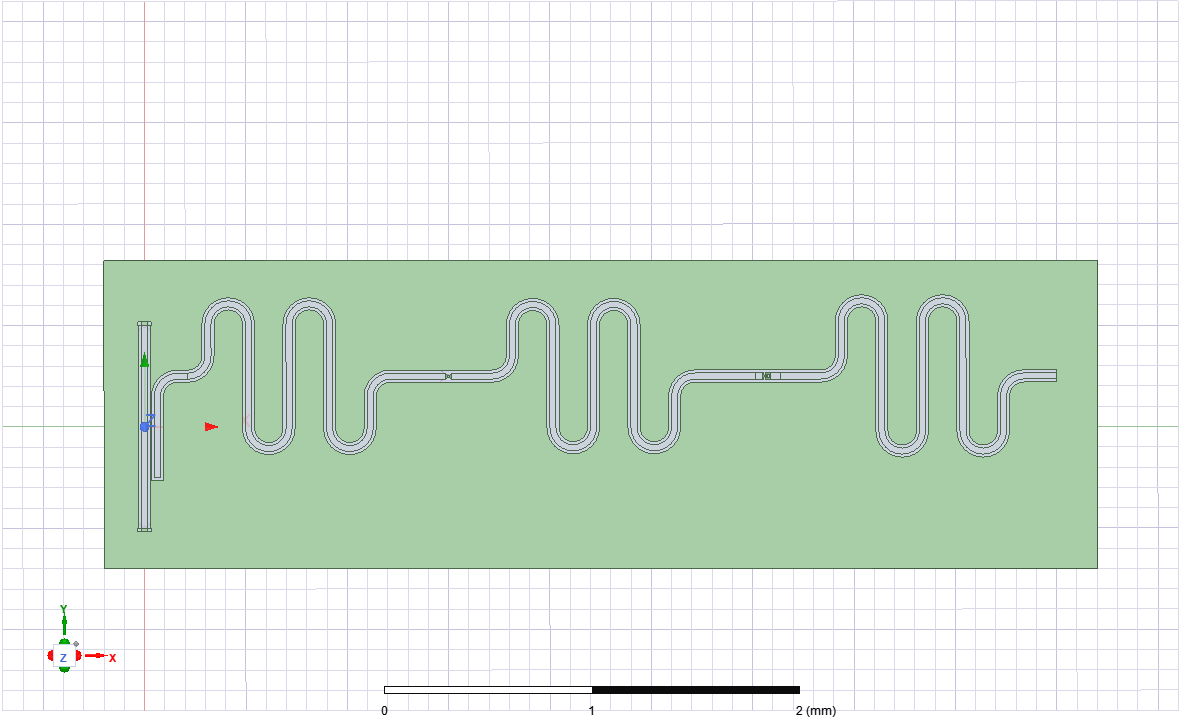

Design "quarterwave_sim_hfss" info:
	# eigenmodes    2
	# variations    1
Design "quarterwave_sim_hfss" info:
	# eigenmodes    2
	# variations    1
freq = 7.273 GHz
Q = 4925.6
kappa = 1000.0 MHz
{'pos_x': '0.0um', 'pos_y': '0.0um', 'orientation': '90', 'chip': 'main', 'layer': '1', 'prime_width': '30um', 'prime_gap': '15um', 'second_width': '30um', 'second_gap': '15um', 'coupling_space': '3um', 'coupling_length': '500um', 'down_length': '150um', 'fillet': '99.9um', 'mirror': False, 'open_termination': True, 'hfss_wire_bonds': False, 'q3d_wire_bonds': False, 'aedt_q3d_wire_bonds': False, 'aedt_hfss_wire_bonds': False}


INFO 04:56AM [connect_project]: Connecting to Ansys Desktop API...
INFO 04:56AM [load_ansys_project]: 	Opened Ansys App
INFO 04:56AM [load_ansys_project]: 	Opened Ansys Desktop v2021.1.0
INFO 04:56AM [load_ansys_project]: 	Opened Ansys Project
	Folder:    D:/andre/PHYS408_finalproj/tcap/src/
	Project:   Tunable_capacitor-qubits-single-value


Starting the Simulation


INFO 04:56AM [connect_design]: 	Opened active design
	Design:    quarterwave_sim_hfss [Solution type: Eigenmode]
INFO 04:56AM [get_setup]: 	Opened setup `test_setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 04:56AM [connect]: 	Connected to project "Tunable_capacitor-qubits-single-value" and design "quarterwave_sim_hfss" 😀 

INFO 04:56AM [connect_design]: 	Opened active design
	Design:    CavitySweep51 [Solution type: Eigenmode]
WARNING 04:56AM [connect_setup]: 	No design setup detected.
WARNING 04:56AM [connect_setup]: 	Creating eigenmode default setup.
INFO 04:56AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


the parameters ['min_converged_passes'] are unsupported, so they have been ignored


INFO 04:56AM [connect_design]: 	Opened active design
	Design:    quarterwave_sim_hfss [Solution type: Eigenmode]


pyaedt INFO: using existing logger.


INFO:Global:using existing logger.


pyaedt INFO: Launching PyAEDT outside AEDT with CPython and PythonNET.


INFO:Global:Launching PyAEDT outside AEDT with CPython and PythonNET.


pyaedt INFO: AEDT installation Path C:\Program Files\AnsysEM\AnsysEM21.1\Win64.


INFO:Global:AEDT installation Path C:\Program Files\AnsysEM\AnsysEM21.1\Win64.


pyaedt INFO: Launching AEDT with module PythonNET.


INFO:Global:Launching AEDT with module PythonNET.


pyaedt WARNING: PyAEDT is not supported in AEDT versions earlier than 2021 R2. Trying to launch PyAEDT with PyWin32.


pyaedt INFO: pyaedt v0.6.46


INFO:Global:pyaedt v0.6.46


pyaedt INFO: Python version 3.11.3 | packaged by conda-forge | (main, Apr  6 2023, 08:50:54) [MSC v.1934 64 bit (AMD64)]


INFO:Global:Python version 3.11.3 | packaged by conda-forge | (main, Apr  6 2023, 08:50:54) [MSC v.1934 64 bit (AMD64)]


pyaedt INFO: Project Tunable_capacitor-qubits-single-value set to active.


INFO:Global:Project Tunable_capacitor-qubits-single-value set to active.


pyaedt INFO: Aedt Objects initialized


INFO:Global:Aedt Objects initialized


pyaedt INFO: Variable Manager initialized


INFO:Global:Variable Manager initialized


pyaedt INFO: Design Loaded


INFO:Global:Design Loaded


pyaedt INFO: Successfully loaded project materials !


INFO:Global:Successfully loaded project materials !


pyaedt INFO: Materials Loaded


INFO:Global:Materials Loaded


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2775, in _refresh_planes


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2775, in _refresh_planes


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _refresh_planes -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _refresh_planes -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:57:32 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:57:32 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_refresh_planes


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_refresh_planes


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2775, in _refresh_planes


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2775, in _refresh_planes


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _refresh_planes -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _refresh_planes -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:57:32 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:57:32 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_refresh_planes


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_refresh_planes


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:57:32 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:57:32 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = main 


ERROR:Global:    name = main 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:57:32 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:57:32 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = sample_holder 


ERROR:Global:    name = sample_holder 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:57:32 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:57:32 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = prime_cpw_clt1 


ERROR:Global:    name = prime_cpw_clt1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:57:32 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:57:32 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = second_cpw_clt1 


ERROR:Global:    name = second_cpw_clt1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:57:32 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:57:32 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = trace_cpw1 


ERROR:Global:    name = trace_cpw1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:57:32 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:57:32 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = second_cpw_top_inline1 


ERROR:Global:    name = second_cpw_top_inline1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:57:32 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:57:32 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = second_cpw_bottom_inline1 


ERROR:Global:    name = second_cpw_bottom_inline1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:57:32 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:57:32 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = trace_cpw2 


ERROR:Global:    name = trace_cpw2 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:57:32 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:57:32 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = trace_cpw3 


ERROR:Global:    name = trace_cpw3 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:57:32 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:57:32 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = banks_0_jjr1 


ERROR:Global:    name = banks_0_jjr1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:57:32 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:57:32 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = banks_1_jjr1 


ERROR:Global:    name = banks_1_jjr1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:57:32 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:57:32 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = cap_body_0_inline1 


ERROR:Global:    name = cap_body_0_inline1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:57:32 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:57:32 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = cap_body_1_inline1 


ERROR:Global:    name = cap_body_1_inline1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:57:32 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:57:32 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = JJ_rect_Lj_jjr1_rect_jj 


ERROR:Global:    name = JJ_rect_Lj_jjr1_rect_jj 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:57:32 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:57:32 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = endcap_clt1_prime_start_1 


ERROR:Global:    name = endcap_clt1_prime_start_1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:57:32 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:57:32 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = endcap_clt1_prime_end_1 


ERROR:Global:    name = endcap_clt1_prime_end_1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:57:32 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:57:32 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = ground_main_plane 


ERROR:Global:    name = ground_main_plane 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:57:32 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:57:32 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = Port_clt1_prime_start 


ERROR:Global:    name = Port_clt1_prime_start 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:57:32 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:57:32 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = Port_clt1_prime_end 


ERROR:Global:    name = Port_clt1_prime_end 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:57:32 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:57:32 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = JJ_Lj_jjr1_rect_jj_ 


ERROR:Global:    name = JJ_Lj_jjr1_rect_jj_ 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:57:32 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:57:32 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = voltage_line_Port_clt1_prime_start 


ERROR:Global:    name = voltage_line_Port_clt1_prime_start 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:57:32 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:57:32 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = voltage_line_Port_clt1_prime_end 


ERROR:Global:    name = voltage_line_Port_clt1_prime_end 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2775, in _refresh_planes


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2775, in _refresh_planes


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _refresh_planes -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _refresh_planes -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:57:33 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (4:57:33 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_refresh_planes


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_refresh_planes


pyaedt INFO: Project files removed from handlers.


INFO:Global:Project files removed from handlers.
INFO 04:57AM [get_setup]: 	Opened setup `test_setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 04:57AM [analyze]: Analyzing setup test_setup
05:01AM 43s INFO [get_f_convergence]: Saved convergences to d:\andre\PHYS408_finalproj\hfss_eig_f_convergence.csv


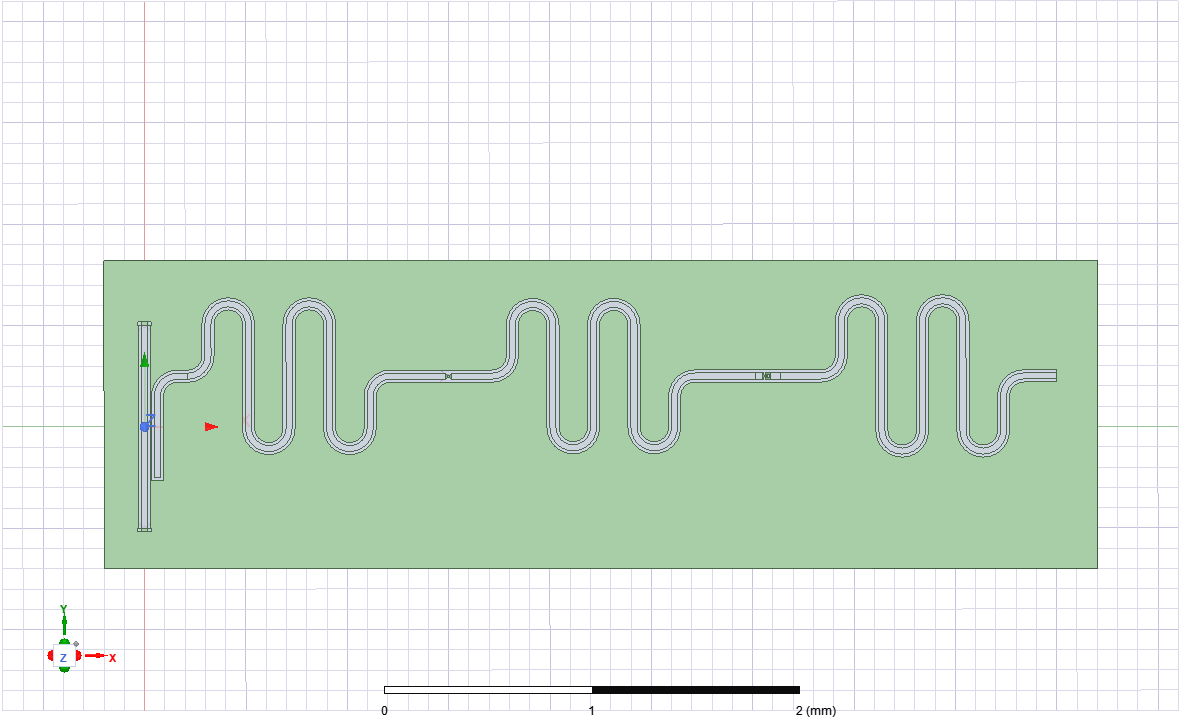

Design "quarterwave_sim_hfss" info:
	# eigenmodes    2
	# variations    1
Design "quarterwave_sim_hfss" info:
	# eigenmodes    2
	# variations    1
freq = 7.16 GHz
Q = 4967.7
kappa = 1000.0 MHz
{'pos_x': '0.0um', 'pos_y': '0.0um', 'orientation': '90', 'chip': 'main', 'layer': '1', 'prime_width': '30um', 'prime_gap': '15um', 'second_width': '30um', 'second_gap': '15um', 'coupling_space': '3um', 'coupling_length': '500um', 'down_length': '150um', 'fillet': '99.9um', 'mirror': False, 'open_termination': True, 'hfss_wire_bonds': False, 'q3d_wire_bonds': False, 'aedt_q3d_wire_bonds': False, 'aedt_hfss_wire_bonds': False}


05:01AM 48s CRITICAL [_qt_message_handler]: line: 0, func: None(), file: None  CRITICAL: QEventDispatcherWin32::wakeUp: Failed to post a message (Not enough quota is available to process this command.)

INFO 05:01AM [connect_project]: Connecting to Ansys Desktop API...
INFO 05:01AM [load_ansys_project]: 	Opened Ansys App
INFO 05:01AM [load_ansys_project]: 	Opened Ansys Desktop v2021.1.0
INFO 05:01AM [load_ansys_project]: 	Opened Ansys Project
	Folder:    D:/andre/PHYS408_finalproj/tcap/src/
	Project:   Tunable_capacitor-qubits-single-value


Starting the Simulation


INFO 05:01AM [connect_design]: 	Opened active design
	Design:    quarterwave_sim_hfss [Solution type: Eigenmode]
INFO 05:01AM [get_setup]: 	Opened setup `test_setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 05:01AM [connect]: 	Connected to project "Tunable_capacitor-qubits-single-value" and design "quarterwave_sim_hfss" 😀 

INFO 05:01AM [connect_design]: 	Opened active design
	Design:    CavitySweep52 [Solution type: Eigenmode]
WARNING 05:01AM [connect_setup]: 	No design setup detected.
WARNING 05:01AM [connect_setup]: 	Creating eigenmode default setup.
INFO 05:01AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


the parameters ['min_converged_passes'] are unsupported, so they have been ignored


INFO 05:01AM [connect_design]: 	Opened active design
	Design:    quarterwave_sim_hfss [Solution type: Eigenmode]


pyaedt INFO: using existing logger.


INFO:Global:using existing logger.


pyaedt INFO: Launching PyAEDT outside AEDT with CPython and PythonNET.


INFO:Global:Launching PyAEDT outside AEDT with CPython and PythonNET.


pyaedt INFO: AEDT installation Path C:\Program Files\AnsysEM\AnsysEM21.1\Win64.


INFO:Global:AEDT installation Path C:\Program Files\AnsysEM\AnsysEM21.1\Win64.


pyaedt INFO: Launching AEDT with module PythonNET.


INFO:Global:Launching AEDT with module PythonNET.


pyaedt WARNING: PyAEDT is not supported in AEDT versions earlier than 2021 R2. Trying to launch PyAEDT with PyWin32.


pyaedt INFO: pyaedt v0.6.46


INFO:Global:pyaedt v0.6.46


pyaedt INFO: Python version 3.11.3 | packaged by conda-forge | (main, Apr  6 2023, 08:50:54) [MSC v.1934 64 bit (AMD64)]


INFO:Global:Python version 3.11.3 | packaged by conda-forge | (main, Apr  6 2023, 08:50:54) [MSC v.1934 64 bit (AMD64)]


pyaedt INFO: Project Tunable_capacitor-qubits-single-value set to active.


INFO:Global:Project Tunable_capacitor-qubits-single-value set to active.


pyaedt INFO: Aedt Objects initialized


INFO:Global:Aedt Objects initialized


pyaedt INFO: Variable Manager initialized


INFO:Global:Variable Manager initialized


pyaedt INFO: Design Loaded


INFO:Global:Design Loaded


pyaedt INFO: Successfully loaded project materials !


INFO:Global:Successfully loaded project materials !


pyaedt INFO: Materials Loaded


INFO:Global:Materials Loaded


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2775, in _refresh_planes


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2775, in _refresh_planes


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _refresh_planes -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _refresh_planes -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:02:41 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:02:41 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_refresh_planes


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_refresh_planes


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2775, in _refresh_planes


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2775, in _refresh_planes


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _refresh_planes -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _refresh_planes -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:02:41 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:02:41 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_refresh_planes


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_refresh_planes


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:02:41 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:02:41 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = main 


ERROR:Global:    name = main 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:02:41 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:02:41 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = sample_holder 


ERROR:Global:    name = sample_holder 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:02:41 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:02:41 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = prime_cpw_clt1 


ERROR:Global:    name = prime_cpw_clt1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:02:41 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:02:41 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = second_cpw_clt1 


ERROR:Global:    name = second_cpw_clt1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:02:41 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:02:41 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = trace_cpw1 


ERROR:Global:    name = trace_cpw1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:02:41 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:02:41 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = second_cpw_top_inline1 


ERROR:Global:    name = second_cpw_top_inline1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:02:41 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:02:41 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = second_cpw_bottom_inline1 


ERROR:Global:    name = second_cpw_bottom_inline1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:02:41 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:02:41 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = trace_cpw2 


ERROR:Global:    name = trace_cpw2 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:02:41 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:02:41 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = trace_cpw3 


ERROR:Global:    name = trace_cpw3 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:02:41 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:02:41 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = banks_0_jjr1 


ERROR:Global:    name = banks_0_jjr1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:02:41 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:02:41 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = banks_1_jjr1 


ERROR:Global:    name = banks_1_jjr1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:02:41 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:02:41 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = cap_body_0_inline1 


ERROR:Global:    name = cap_body_0_inline1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:02:41 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:02:41 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = cap_body_1_inline1 


ERROR:Global:    name = cap_body_1_inline1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:02:41 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:02:41 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = JJ_rect_Lj_jjr1_rect_jj 


ERROR:Global:    name = JJ_rect_Lj_jjr1_rect_jj 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:02:41 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:02:41 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = endcap_clt1_prime_start_1 


ERROR:Global:    name = endcap_clt1_prime_start_1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:02:41 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:02:41 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = endcap_clt1_prime_end_1 


ERROR:Global:    name = endcap_clt1_prime_end_1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:02:41 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:02:41 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = ground_main_plane 


ERROR:Global:    name = ground_main_plane 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:02:41 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:02:41 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = Port_clt1_prime_start 


ERROR:Global:    name = Port_clt1_prime_start 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:02:41 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:02:41 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = Port_clt1_prime_end 


ERROR:Global:    name = Port_clt1_prime_end 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:02:41 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:02:41 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = JJ_Lj_jjr1_rect_jj_ 


ERROR:Global:    name = JJ_Lj_jjr1_rect_jj_ 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:02:41 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:02:41 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = voltage_line_Port_clt1_prime_start 


ERROR:Global:    name = voltage_line_Port_clt1_prime_start 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:02:41 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:02:41 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = voltage_line_Port_clt1_prime_end 


ERROR:Global:    name = voltage_line_Port_clt1_prime_end 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2775, in _refresh_planes


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2775, in _refresh_planes


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _refresh_planes -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _refresh_planes -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:02:42 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:02:42 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_refresh_planes


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_refresh_planes


pyaedt INFO: Project files removed from handlers.


INFO:Global:Project files removed from handlers.
INFO 05:02AM [__del__]: Disconnected from Ansys HFSS
INFO 05:02AM [get_setup]: 	Opened setup `test_setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 05:02AM [analyze]: Analyzing setup test_setup
05:06AM 44s INFO [get_f_convergence]: Saved convergences to d:\andre\PHYS408_finalproj\hfss_eig_f_convergence.csv


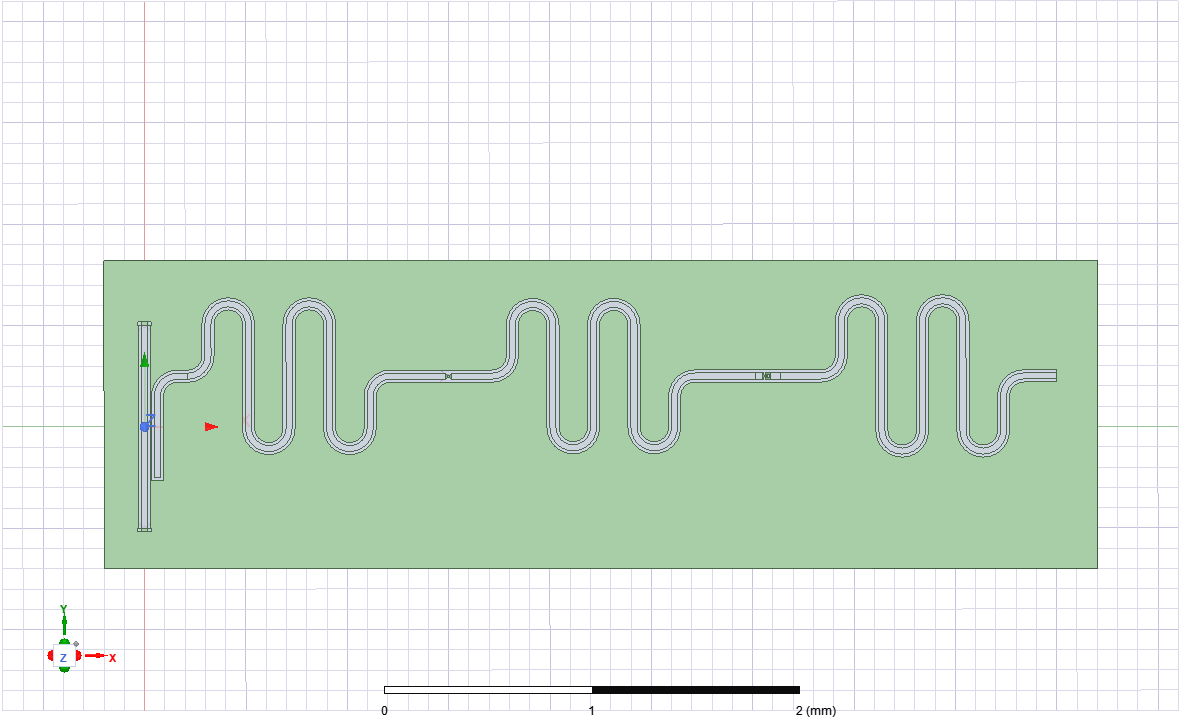

Design "quarterwave_sim_hfss" info:
	# eigenmodes    2
	# variations    1
Design "quarterwave_sim_hfss" info:
	# eigenmodes    2
	# variations    1
freq = 7.043 GHz
Q = 5350.6
kappa = 1000.0 MHz
{'pos_x': '0.0um', 'pos_y': '0.0um', 'orientation': '90', 'chip': 'main', 'layer': '1', 'prime_width': '30um', 'prime_gap': '15um', 'second_width': '30um', 'second_gap': '15um', 'coupling_space': '3um', 'coupling_length': '500um', 'down_length': '150um', 'fillet': '99.9um', 'mirror': False, 'open_termination': True, 'hfss_wire_bonds': False, 'q3d_wire_bonds': False, 'aedt_q3d_wire_bonds': False, 'aedt_hfss_wire_bonds': False}


INFO 05:06AM [connect_project]: Connecting to Ansys Desktop API...
INFO 05:06AM [load_ansys_project]: 	Opened Ansys App
INFO 05:06AM [load_ansys_project]: 	Opened Ansys Desktop v2021.1.0
INFO 05:06AM [load_ansys_project]: 	Opened Ansys Project
	Folder:    D:/andre/PHYS408_finalproj/tcap/src/
	Project:   Tunable_capacitor-qubits-single-value


Starting the Simulation


INFO 05:06AM [connect_design]: 	Opened active design
	Design:    quarterwave_sim_hfss [Solution type: Eigenmode]
INFO 05:06AM [get_setup]: 	Opened setup `test_setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 05:06AM [connect]: 	Connected to project "Tunable_capacitor-qubits-single-value" and design "quarterwave_sim_hfss" 😀 

INFO 05:06AM [connect_design]: 	Opened active design
	Design:    CavitySweep53 [Solution type: Eigenmode]
WARNING 05:06AM [connect_setup]: 	No design setup detected.
WARNING 05:06AM [connect_setup]: 	Creating eigenmode default setup.
INFO 05:06AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


the parameters ['min_converged_passes'] are unsupported, so they have been ignored


INFO 05:06AM [connect_design]: 	Opened active design
	Design:    quarterwave_sim_hfss [Solution type: Eigenmode]


pyaedt INFO: using existing logger.


INFO:Global:using existing logger.


pyaedt INFO: Launching PyAEDT outside AEDT with CPython and PythonNET.


INFO:Global:Launching PyAEDT outside AEDT with CPython and PythonNET.


pyaedt INFO: AEDT installation Path C:\Program Files\AnsysEM\AnsysEM21.1\Win64.


INFO:Global:AEDT installation Path C:\Program Files\AnsysEM\AnsysEM21.1\Win64.


pyaedt INFO: Launching AEDT with module PythonNET.


INFO:Global:Launching AEDT with module PythonNET.


pyaedt WARNING: PyAEDT is not supported in AEDT versions earlier than 2021 R2. Trying to launch PyAEDT with PyWin32.


pyaedt INFO: pyaedt v0.6.46


INFO:Global:pyaedt v0.6.46


pyaedt INFO: Python version 3.11.3 | packaged by conda-forge | (main, Apr  6 2023, 08:50:54) [MSC v.1934 64 bit (AMD64)]


INFO:Global:Python version 3.11.3 | packaged by conda-forge | (main, Apr  6 2023, 08:50:54) [MSC v.1934 64 bit (AMD64)]


pyaedt INFO: Project Tunable_capacitor-qubits-single-value set to active.


INFO:Global:Project Tunable_capacitor-qubits-single-value set to active.


pyaedt INFO: Aedt Objects initialized


INFO:Global:Aedt Objects initialized


pyaedt INFO: Variable Manager initialized


INFO:Global:Variable Manager initialized


pyaedt INFO: Design Loaded


INFO:Global:Design Loaded


pyaedt INFO: Successfully loaded project materials !


INFO:Global:Successfully loaded project materials !


pyaedt INFO: Materials Loaded


INFO:Global:Materials Loaded


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2775, in _refresh_planes


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2775, in _refresh_planes


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _refresh_planes -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _refresh_planes -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:07:48 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:07:48 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_refresh_planes


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_refresh_planes


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2775, in _refresh_planes


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2775, in _refresh_planes


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _refresh_planes -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _refresh_planes -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:07:48 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:07:48 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_refresh_planes


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_refresh_planes


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:07:48 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:07:48 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = main 


ERROR:Global:    name = main 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:07:48 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:07:48 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = sample_holder 


ERROR:Global:    name = sample_holder 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:07:48 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:07:48 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = prime_cpw_clt1 


ERROR:Global:    name = prime_cpw_clt1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:07:48 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:07:48 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = second_cpw_clt1 


ERROR:Global:    name = second_cpw_clt1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:07:48 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:07:48 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = trace_cpw1 


ERROR:Global:    name = trace_cpw1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:07:48 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:07:48 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = second_cpw_top_inline1 


ERROR:Global:    name = second_cpw_top_inline1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:07:48 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:07:48 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = second_cpw_bottom_inline1 


ERROR:Global:    name = second_cpw_bottom_inline1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:07:48 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:07:48 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = trace_cpw2 


ERROR:Global:    name = trace_cpw2 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:07:48 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:07:48 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = trace_cpw3 


ERROR:Global:    name = trace_cpw3 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:07:48 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:07:48 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = banks_0_jjr1 


ERROR:Global:    name = banks_0_jjr1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:07:48 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:07:48 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = banks_1_jjr1 


ERROR:Global:    name = banks_1_jjr1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:07:48 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:07:48 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = cap_body_0_inline1 


ERROR:Global:    name = cap_body_0_inline1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:07:48 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:07:48 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = cap_body_1_inline1 


ERROR:Global:    name = cap_body_1_inline1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:07:48 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:07:48 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = JJ_rect_Lj_jjr1_rect_jj 


ERROR:Global:    name = JJ_rect_Lj_jjr1_rect_jj 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:07:48 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:07:48 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = endcap_clt1_prime_start_1 


ERROR:Global:    name = endcap_clt1_prime_start_1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:07:48 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:07:48 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = endcap_clt1_prime_end_1 


ERROR:Global:    name = endcap_clt1_prime_end_1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:07:48 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:07:48 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = ground_main_plane 


ERROR:Global:    name = ground_main_plane 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:07:48 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:07:48 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = Port_clt1_prime_start 


ERROR:Global:    name = Port_clt1_prime_start 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:07:48 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:07:48 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = Port_clt1_prime_end 


ERROR:Global:    name = Port_clt1_prime_end 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:07:48 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:07:48 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = JJ_Lj_jjr1_rect_jj_ 


ERROR:Global:    name = JJ_Lj_jjr1_rect_jj_ 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:07:48 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:07:48 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = voltage_line_Port_clt1_prime_start 


ERROR:Global:    name = voltage_line_Port_clt1_prime_start 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:07:49 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:07:49 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = voltage_line_Port_clt1_prime_end 


ERROR:Global:    name = voltage_line_Port_clt1_prime_end 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2775, in _refresh_planes


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2775, in _refresh_planes


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _refresh_planes -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _refresh_planes -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:07:49 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:07:49 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_refresh_planes


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_refresh_planes


pyaedt INFO: Project files removed from handlers.


INFO:Global:Project files removed from handlers.
INFO 05:07AM [__del__]: Disconnected from Ansys HFSS
INFO 05:07AM [get_setup]: 	Opened setup `test_setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 05:07AM [analyze]: Analyzing setup test_setup
05:11AM 53s INFO [get_f_convergence]: Saved convergences to d:\andre\PHYS408_finalproj\hfss_eig_f_convergence.csv


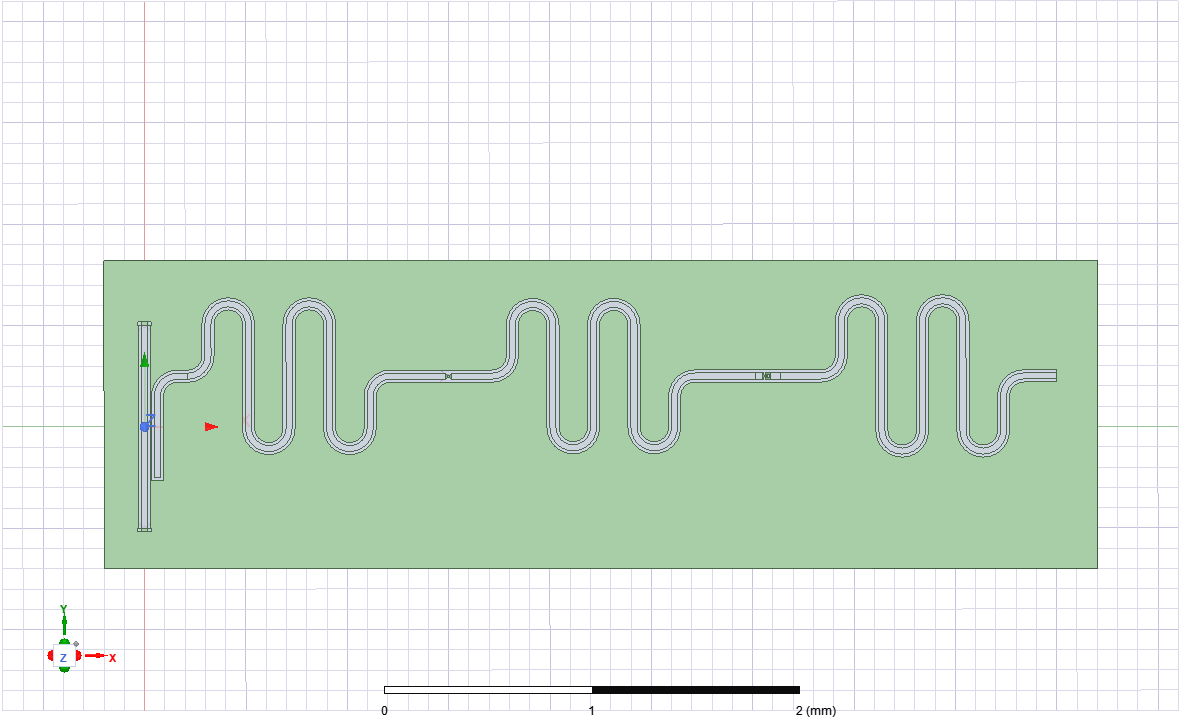

Design "quarterwave_sim_hfss" info:
	# eigenmodes    2
	# variations    1
Design "quarterwave_sim_hfss" info:
	# eigenmodes    2
	# variations    1
freq = 6.938 GHz
Q = 5215.7
kappa = 1000.0 MHz
{'pos_x': '0.0um', 'pos_y': '0.0um', 'orientation': '90', 'chip': 'main', 'layer': '1', 'prime_width': '30um', 'prime_gap': '15um', 'second_width': '30um', 'second_gap': '15um', 'coupling_space': '3um', 'coupling_length': '500um', 'down_length': '150um', 'fillet': '99.9um', 'mirror': False, 'open_termination': True, 'hfss_wire_bonds': False, 'q3d_wire_bonds': False, 'aedt_q3d_wire_bonds': False, 'aedt_hfss_wire_bonds': False}


INFO 05:11AM [connect_project]: Connecting to Ansys Desktop API...
INFO 05:11AM [load_ansys_project]: 	Opened Ansys App
INFO 05:11AM [load_ansys_project]: 	Opened Ansys Desktop v2021.1.0
INFO 05:11AM [load_ansys_project]: 	Opened Ansys Project
	Folder:    D:/andre/PHYS408_finalproj/tcap/src/
	Project:   Tunable_capacitor-qubits-single-value


Starting the Simulation


INFO 05:11AM [connect_design]: 	Opened active design
	Design:    quarterwave_sim_hfss [Solution type: Eigenmode]
INFO 05:11AM [get_setup]: 	Opened setup `test_setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 05:11AM [connect]: 	Connected to project "Tunable_capacitor-qubits-single-value" and design "quarterwave_sim_hfss" 😀 

INFO 05:12AM [connect_design]: 	Opened active design
	Design:    CavitySweep54 [Solution type: Eigenmode]
WARNING 05:12AM [connect_setup]: 	No design setup detected.
WARNING 05:12AM [connect_setup]: 	Creating eigenmode default setup.
INFO 05:12AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


the parameters ['min_converged_passes'] are unsupported, so they have been ignored


INFO 05:12AM [connect_design]: 	Opened active design
	Design:    quarterwave_sim_hfss [Solution type: Eigenmode]


pyaedt INFO: using existing logger.


INFO:Global:using existing logger.


pyaedt INFO: Launching PyAEDT outside AEDT with CPython and PythonNET.


INFO:Global:Launching PyAEDT outside AEDT with CPython and PythonNET.


pyaedt INFO: AEDT installation Path C:\Program Files\AnsysEM\AnsysEM21.1\Win64.


INFO:Global:AEDT installation Path C:\Program Files\AnsysEM\AnsysEM21.1\Win64.


pyaedt INFO: Launching AEDT with module PythonNET.


INFO:Global:Launching AEDT with module PythonNET.


pyaedt WARNING: PyAEDT is not supported in AEDT versions earlier than 2021 R2. Trying to launch PyAEDT with PyWin32.


pyaedt INFO: pyaedt v0.6.46


INFO:Global:pyaedt v0.6.46


pyaedt INFO: Python version 3.11.3 | packaged by conda-forge | (main, Apr  6 2023, 08:50:54) [MSC v.1934 64 bit (AMD64)]


INFO:Global:Python version 3.11.3 | packaged by conda-forge | (main, Apr  6 2023, 08:50:54) [MSC v.1934 64 bit (AMD64)]


pyaedt INFO: Project Tunable_capacitor-qubits-single-value set to active.


INFO:Global:Project Tunable_capacitor-qubits-single-value set to active.


pyaedt INFO: Aedt Objects initialized


INFO:Global:Aedt Objects initialized


pyaedt INFO: Variable Manager initialized


INFO:Global:Variable Manager initialized


pyaedt INFO: Design Loaded


INFO:Global:Design Loaded


pyaedt INFO: Successfully loaded project materials !


INFO:Global:Successfully loaded project materials !


pyaedt INFO: Materials Loaded


INFO:Global:Materials Loaded


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2775, in _refresh_planes


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2775, in _refresh_planes


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _refresh_planes -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _refresh_planes -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:12:56 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:12:56 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_refresh_planes


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_refresh_planes


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2775, in _refresh_planes


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2775, in _refresh_planes


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _refresh_planes -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _refresh_planes -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:12:56 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:12:56 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_refresh_planes


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_refresh_planes


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:12:56 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:12:56 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = main 


ERROR:Global:    name = main 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:12:56 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:12:56 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = sample_holder 


ERROR:Global:    name = sample_holder 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:12:56 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:12:56 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = prime_cpw_clt1 


ERROR:Global:    name = prime_cpw_clt1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:12:56 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:12:56 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = second_cpw_clt1 


ERROR:Global:    name = second_cpw_clt1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:12:56 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:12:56 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = trace_cpw1 


ERROR:Global:    name = trace_cpw1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:12:56 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:12:56 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = second_cpw_top_inline1 


ERROR:Global:    name = second_cpw_top_inline1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:12:56 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:12:56 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = second_cpw_bottom_inline1 


ERROR:Global:    name = second_cpw_bottom_inline1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:12:56 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:12:56 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = trace_cpw2 


ERROR:Global:    name = trace_cpw2 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:12:56 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:12:56 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = trace_cpw3 


ERROR:Global:    name = trace_cpw3 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:12:56 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:12:56 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = banks_0_jjr1 


ERROR:Global:    name = banks_0_jjr1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:12:56 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:12:56 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = banks_1_jjr1 


ERROR:Global:    name = banks_1_jjr1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:12:56 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:12:56 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = cap_body_0_inline1 


ERROR:Global:    name = cap_body_0_inline1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:12:56 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:12:56 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = cap_body_1_inline1 


ERROR:Global:    name = cap_body_1_inline1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:12:56 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:12:56 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = JJ_rect_Lj_jjr1_rect_jj 


ERROR:Global:    name = JJ_rect_Lj_jjr1_rect_jj 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:12:57 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:12:57 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = endcap_clt1_prime_start_1 


ERROR:Global:    name = endcap_clt1_prime_start_1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:12:57 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:12:57 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = endcap_clt1_prime_end_1 


ERROR:Global:    name = endcap_clt1_prime_end_1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:12:57 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:12:57 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = ground_main_plane 


ERROR:Global:    name = ground_main_plane 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:12:57 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:12:57 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = Port_clt1_prime_start 


ERROR:Global:    name = Port_clt1_prime_start 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:12:57 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:12:57 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = Port_clt1_prime_end 


ERROR:Global:    name = Port_clt1_prime_end 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:12:57 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:12:57 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = JJ_Lj_jjr1_rect_jj_ 


ERROR:Global:    name = JJ_Lj_jjr1_rect_jj_ 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:12:57 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:12:57 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = voltage_line_Port_clt1_prime_start 


ERROR:Global:    name = voltage_line_Port_clt1_prime_start 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:12:57 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:12:57 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = voltage_line_Port_clt1_prime_end 


ERROR:Global:    name = voltage_line_Port_clt1_prime_end 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2775, in _refresh_planes


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2775, in _refresh_planes


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _refresh_planes -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _refresh_planes -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:12:57 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:12:57 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_refresh_planes


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_refresh_planes


pyaedt INFO: Project files removed from handlers.


INFO:Global:Project files removed from handlers.
INFO 05:12AM [__del__]: Disconnected from Ansys HFSS
INFO 05:12AM [get_setup]: 	Opened setup `test_setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 05:12AM [analyze]: Analyzing setup test_setup
05:16AM 55s INFO [get_f_convergence]: Saved convergences to d:\andre\PHYS408_finalproj\hfss_eig_f_convergence.csv


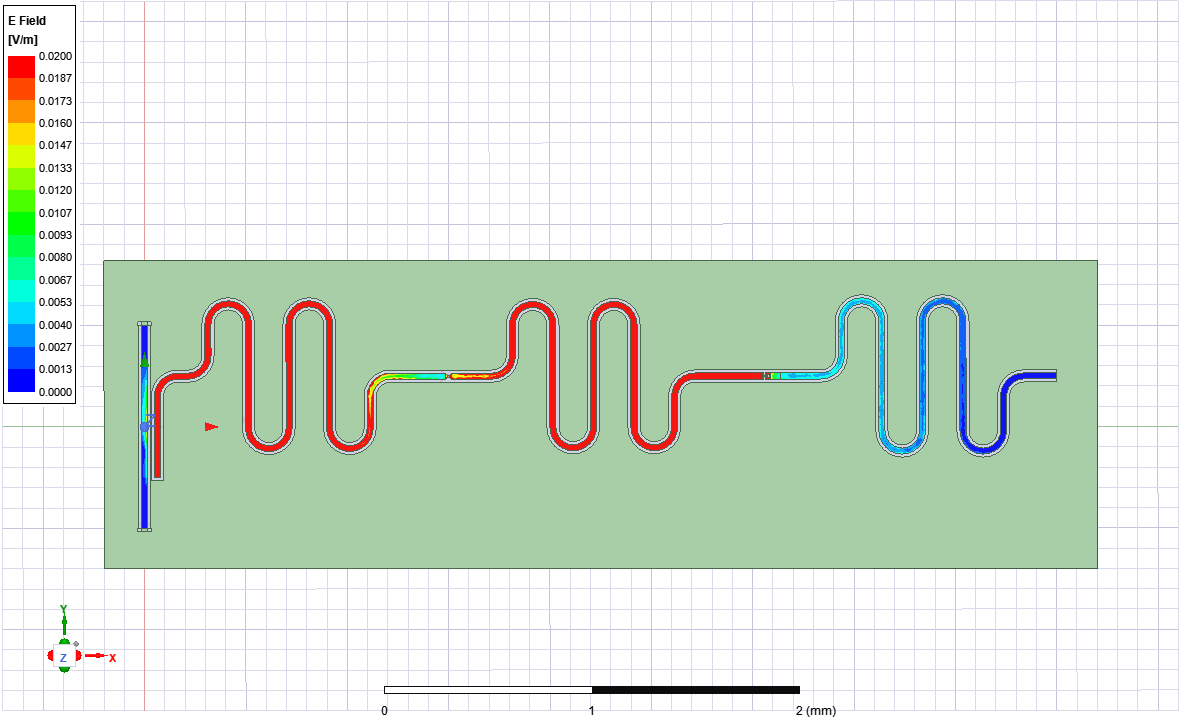

Design "quarterwave_sim_hfss" info:
	# eigenmodes    2
	# variations    1
Design "quarterwave_sim_hfss" info:
	# eigenmodes    2
	# variations    1
freq = 6.83 GHz
Q = 5248.8
kappa = 1000.0 MHz
{'pos_x': '0.0um', 'pos_y': '0.0um', 'orientation': '90', 'chip': 'main', 'layer': '1', 'prime_width': '30um', 'prime_gap': '15um', 'second_width': '30um', 'second_gap': '15um', 'coupling_space': '3um', 'coupling_length': '500um', 'down_length': '150um', 'fillet': '99.9um', 'mirror': False, 'open_termination': True, 'hfss_wire_bonds': False, 'q3d_wire_bonds': False, 'aedt_q3d_wire_bonds': False, 'aedt_hfss_wire_bonds': False}


INFO 05:16AM [connect_project]: Connecting to Ansys Desktop API...
INFO 05:16AM [load_ansys_project]: 	Opened Ansys App
INFO 05:16AM [load_ansys_project]: 	Opened Ansys Desktop v2021.1.0
INFO 05:16AM [load_ansys_project]: 	Opened Ansys Project
	Folder:    D:/andre/PHYS408_finalproj/tcap/src/
	Project:   Tunable_capacitor-qubits-single-value


Starting the Simulation


INFO 05:16AM [connect_design]: 	Opened active design
	Design:    quarterwave_sim_hfss [Solution type: Eigenmode]
INFO 05:16AM [get_setup]: 	Opened setup `test_setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 05:16AM [connect]: 	Connected to project "Tunable_capacitor-qubits-single-value" and design "quarterwave_sim_hfss" 😀 

INFO 05:17AM [connect_design]: 	Opened active design
	Design:    CavitySweep55 [Solution type: Eigenmode]
WARNING 05:17AM [connect_setup]: 	No design setup detected.
WARNING 05:17AM [connect_setup]: 	Creating eigenmode default setup.
INFO 05:17AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


the parameters ['min_converged_passes'] are unsupported, so they have been ignored


INFO 05:17AM [connect_design]: 	Opened active design
	Design:    quarterwave_sim_hfss [Solution type: Eigenmode]


pyaedt INFO: using existing logger.


INFO:Global:using existing logger.


pyaedt INFO: Launching PyAEDT outside AEDT with CPython and PythonNET.


INFO:Global:Launching PyAEDT outside AEDT with CPython and PythonNET.


pyaedt INFO: AEDT installation Path C:\Program Files\AnsysEM\AnsysEM21.1\Win64.


INFO:Global:AEDT installation Path C:\Program Files\AnsysEM\AnsysEM21.1\Win64.


pyaedt INFO: Launching AEDT with module PythonNET.


INFO:Global:Launching AEDT with module PythonNET.


pyaedt WARNING: PyAEDT is not supported in AEDT versions earlier than 2021 R2. Trying to launch PyAEDT with PyWin32.


pyaedt INFO: pyaedt v0.6.46


INFO:Global:pyaedt v0.6.46


pyaedt INFO: Python version 3.11.3 | packaged by conda-forge | (main, Apr  6 2023, 08:50:54) [MSC v.1934 64 bit (AMD64)]


INFO:Global:Python version 3.11.3 | packaged by conda-forge | (main, Apr  6 2023, 08:50:54) [MSC v.1934 64 bit (AMD64)]


pyaedt INFO: Project Tunable_capacitor-qubits-single-value set to active.


INFO:Global:Project Tunable_capacitor-qubits-single-value set to active.


pyaedt INFO: Aedt Objects initialized


INFO:Global:Aedt Objects initialized


pyaedt INFO: Variable Manager initialized


INFO:Global:Variable Manager initialized


pyaedt INFO: Design Loaded


INFO:Global:Design Loaded


pyaedt INFO: Successfully loaded project materials !


INFO:Global:Successfully loaded project materials !


pyaedt INFO: Materials Loaded


INFO:Global:Materials Loaded


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2775, in _refresh_planes


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2775, in _refresh_planes


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _refresh_planes -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _refresh_planes -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:18:00 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:18:00 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_refresh_planes


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_refresh_planes


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2775, in _refresh_planes


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2775, in _refresh_planes


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _refresh_planes -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _refresh_planes -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:18:00 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:18:00 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_refresh_planes


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_refresh_planes


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:18:00 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:18:00 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = main 


ERROR:Global:    name = main 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:18:00 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:18:00 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = sample_holder 


ERROR:Global:    name = sample_holder 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:18:00 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:18:00 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = prime_cpw_clt1 


ERROR:Global:    name = prime_cpw_clt1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:18:00 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:18:00 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = second_cpw_clt1 


ERROR:Global:    name = second_cpw_clt1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:18:00 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:18:00 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = trace_cpw1 


ERROR:Global:    name = trace_cpw1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:18:00 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:18:00 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = second_cpw_top_inline1 


ERROR:Global:    name = second_cpw_top_inline1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:18:00 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:18:00 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = second_cpw_bottom_inline1 


ERROR:Global:    name = second_cpw_bottom_inline1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:18:00 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:18:00 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = trace_cpw2 


ERROR:Global:    name = trace_cpw2 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:18:00 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:18:00 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = trace_cpw3 


ERROR:Global:    name = trace_cpw3 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:18:00 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:18:00 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = banks_0_jjr1 


ERROR:Global:    name = banks_0_jjr1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:18:00 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:18:00 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = banks_1_jjr1 


ERROR:Global:    name = banks_1_jjr1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:18:00 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:18:00 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = cap_body_0_inline1 


ERROR:Global:    name = cap_body_0_inline1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:18:00 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:18:00 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = cap_body_1_inline1 


ERROR:Global:    name = cap_body_1_inline1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:18:00 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:18:00 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = JJ_rect_Lj_jjr1_rect_jj 


ERROR:Global:    name = JJ_rect_Lj_jjr1_rect_jj 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:18:00 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:18:00 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = endcap_clt1_prime_start_1 


ERROR:Global:    name = endcap_clt1_prime_start_1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:18:01 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:18:01 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = endcap_clt1_prime_end_1 


ERROR:Global:    name = endcap_clt1_prime_end_1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:18:01 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:18:01 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = ground_main_plane 


ERROR:Global:    name = ground_main_plane 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:18:01 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:18:01 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = Port_clt1_prime_start 


ERROR:Global:    name = Port_clt1_prime_start 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:18:01 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:18:01 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = Port_clt1_prime_end 


ERROR:Global:    name = Port_clt1_prime_end 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:18:01 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:18:01 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = JJ_Lj_jjr1_rect_jj_ 


ERROR:Global:    name = JJ_Lj_jjr1_rect_jj_ 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:18:01 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:18:01 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = voltage_line_Port_clt1_prime_start 


ERROR:Global:    name = voltage_line_Port_clt1_prime_start 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:18:01 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:18:01 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = voltage_line_Port_clt1_prime_end 


ERROR:Global:    name = voltage_line_Port_clt1_prime_end 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2775, in _refresh_planes


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2775, in _refresh_planes


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _refresh_planes -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _refresh_planes -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:18:01 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:18:01 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_refresh_planes


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_refresh_planes


pyaedt INFO: Project files removed from handlers.


INFO:Global:Project files removed from handlers.
INFO 05:18AM [__del__]: Disconnected from Ansys HFSS
INFO 05:18AM [get_setup]: 	Opened setup `test_setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 05:18AM [analyze]: Analyzing setup test_setup
05:22AM 07s INFO [get_f_convergence]: Saved convergences to d:\andre\PHYS408_finalproj\hfss_eig_f_convergence.csv


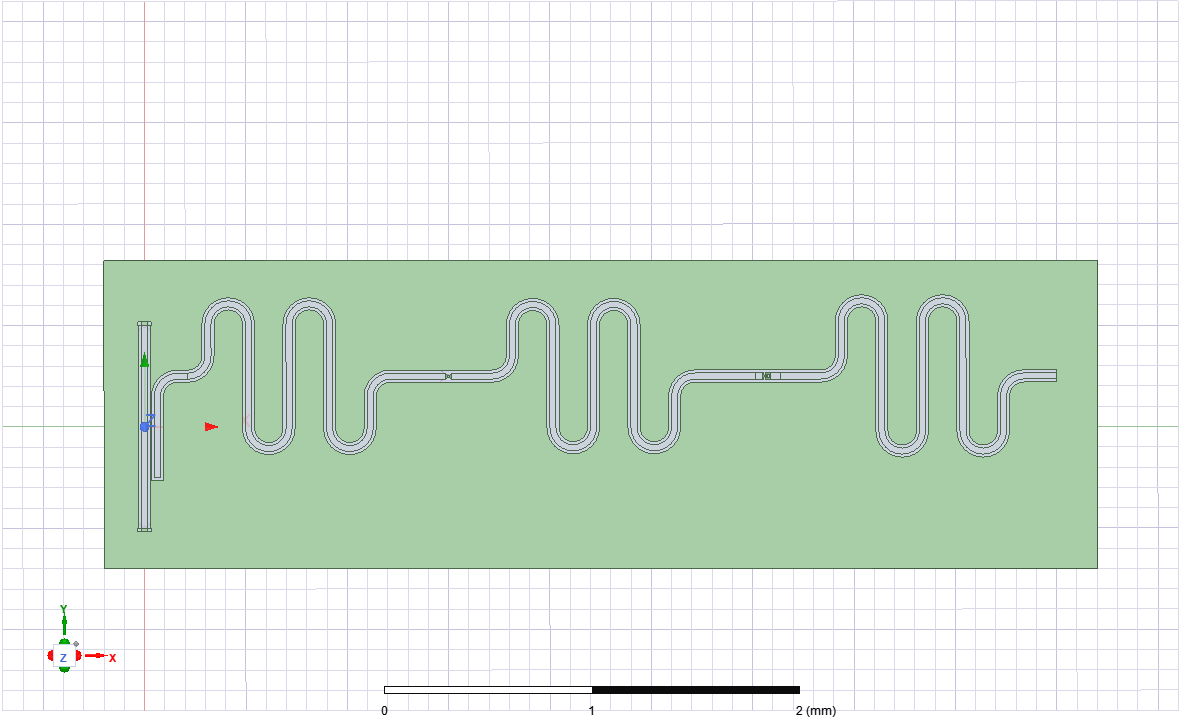

Design "quarterwave_sim_hfss" info:
	# eigenmodes    2
	# variations    1
Design "quarterwave_sim_hfss" info:
	# eigenmodes    2
	# variations    1
freq = 6.719 GHz
Q = 5729.2
kappa = 1000.0 MHz
{'pos_x': '0.0um', 'pos_y': '0.0um', 'orientation': '90', 'chip': 'main', 'layer': '1', 'prime_width': '30um', 'prime_gap': '15um', 'second_width': '30um', 'second_gap': '15um', 'coupling_space': '3um', 'coupling_length': '500um', 'down_length': '150um', 'fillet': '99.9um', 'mirror': False, 'open_termination': True, 'hfss_wire_bonds': False, 'q3d_wire_bonds': False, 'aedt_q3d_wire_bonds': False, 'aedt_hfss_wire_bonds': False}


05:22AM 12s CRITICAL [_qt_message_handler]: line: 0, func: None(), file: None  CRITICAL: QEventDispatcherWin32::wakeUp: Failed to post a message (Not enough quota is available to process this command.)

INFO 05:22AM [connect_project]: Connecting to Ansys Desktop API...
INFO 05:22AM [load_ansys_project]: 	Opened Ansys App
INFO 05:22AM [load_ansys_project]: 	Opened Ansys Desktop v2021.1.0
INFO 05:22AM [load_ansys_project]: 	Opened Ansys Project
	Folder:    D:/andre/PHYS408_finalproj/tcap/src/
	Project:   Tunable_capacitor-qubits-single-value


Starting the Simulation


INFO 05:22AM [connect_design]: 	Opened active design
	Design:    quarterwave_sim_hfss [Solution type: Eigenmode]
INFO 05:22AM [get_setup]: 	Opened setup `test_setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 05:22AM [connect]: 	Connected to project "Tunable_capacitor-qubits-single-value" and design "quarterwave_sim_hfss" 😀 

INFO 05:22AM [connect_design]: 	Opened active design
	Design:    CavitySweep56 [Solution type: Eigenmode]
WARNING 05:22AM [connect_setup]: 	No design setup detected.
WARNING 05:22AM [connect_setup]: 	Creating eigenmode default setup.
INFO 05:22AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


the parameters ['min_converged_passes'] are unsupported, so they have been ignored


INFO 05:22AM [connect_design]: 	Opened active design
	Design:    quarterwave_sim_hfss [Solution type: Eigenmode]


pyaedt INFO: using existing logger.


INFO:Global:using existing logger.


pyaedt INFO: Launching PyAEDT outside AEDT with CPython and PythonNET.


INFO:Global:Launching PyAEDT outside AEDT with CPython and PythonNET.


pyaedt INFO: AEDT installation Path C:\Program Files\AnsysEM\AnsysEM21.1\Win64.


INFO:Global:AEDT installation Path C:\Program Files\AnsysEM\AnsysEM21.1\Win64.


pyaedt INFO: Launching AEDT with module PythonNET.


INFO:Global:Launching AEDT with module PythonNET.


pyaedt WARNING: PyAEDT is not supported in AEDT versions earlier than 2021 R2. Trying to launch PyAEDT with PyWin32.


pyaedt INFO: pyaedt v0.6.46


INFO:Global:pyaedt v0.6.46


pyaedt INFO: Python version 3.11.3 | packaged by conda-forge | (main, Apr  6 2023, 08:50:54) [MSC v.1934 64 bit (AMD64)]


INFO:Global:Python version 3.11.3 | packaged by conda-forge | (main, Apr  6 2023, 08:50:54) [MSC v.1934 64 bit (AMD64)]


pyaedt INFO: Project Tunable_capacitor-qubits-single-value set to active.


INFO:Global:Project Tunable_capacitor-qubits-single-value set to active.


pyaedt INFO: Aedt Objects initialized


INFO:Global:Aedt Objects initialized


pyaedt INFO: Variable Manager initialized


INFO:Global:Variable Manager initialized


pyaedt INFO: Design Loaded


INFO:Global:Design Loaded


pyaedt INFO: Successfully loaded project materials !


INFO:Global:Successfully loaded project materials !


pyaedt INFO: Materials Loaded


INFO:Global:Materials Loaded


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2775, in _refresh_planes


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2775, in _refresh_planes


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _refresh_planes -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _refresh_planes -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:23:11 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:23:11 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_refresh_planes


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_refresh_planes


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2775, in _refresh_planes


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2775, in _refresh_planes


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _refresh_planes -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _refresh_planes -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:23:11 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:23:11 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_refresh_planes


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_refresh_planes


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:23:11 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:23:11 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = main 


ERROR:Global:    name = main 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:23:11 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:23:11 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = sample_holder 


ERROR:Global:    name = sample_holder 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:23:11 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:23:11 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = prime_cpw_clt1 


ERROR:Global:    name = prime_cpw_clt1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:23:11 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:23:11 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = second_cpw_clt1 


ERROR:Global:    name = second_cpw_clt1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:23:11 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:23:11 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = trace_cpw1 


ERROR:Global:    name = trace_cpw1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:23:11 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:23:11 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = second_cpw_top_inline1 


ERROR:Global:    name = second_cpw_top_inline1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:23:11 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:23:11 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = second_cpw_bottom_inline1 


ERROR:Global:    name = second_cpw_bottom_inline1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:23:11 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:23:11 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = trace_cpw2 


ERROR:Global:    name = trace_cpw2 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:23:11 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:23:11 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = trace_cpw3 


ERROR:Global:    name = trace_cpw3 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:23:11 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:23:11 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = banks_0_jjr1 


ERROR:Global:    name = banks_0_jjr1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:23:11 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:23:11 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = banks_1_jjr1 


ERROR:Global:    name = banks_1_jjr1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:23:11 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:23:11 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = cap_body_0_inline1 


ERROR:Global:    name = cap_body_0_inline1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:23:11 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:23:11 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = cap_body_1_inline1 


ERROR:Global:    name = cap_body_1_inline1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:23:11 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:23:11 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = JJ_rect_Lj_jjr1_rect_jj 


ERROR:Global:    name = JJ_rect_Lj_jjr1_rect_jj 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:23:11 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:23:11 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = endcap_clt1_prime_start_1 


ERROR:Global:    name = endcap_clt1_prime_start_1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:23:11 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:23:11 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = endcap_clt1_prime_end_1 


ERROR:Global:    name = endcap_clt1_prime_end_1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:23:11 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:23:11 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = ground_main_plane 


ERROR:Global:    name = ground_main_plane 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:23:11 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:23:11 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = Port_clt1_prime_start 


ERROR:Global:    name = Port_clt1_prime_start 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:23:11 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:23:11 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = Port_clt1_prime_end 


ERROR:Global:    name = Port_clt1_prime_end 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:23:11 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:23:11 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = JJ_Lj_jjr1_rect_jj_ 


ERROR:Global:    name = JJ_Lj_jjr1_rect_jj_ 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:23:11 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:23:11 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = voltage_line_Port_clt1_prime_start 


ERROR:Global:    name = voltage_line_Port_clt1_prime_start 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:23:12 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:23:12 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = voltage_line_Port_clt1_prime_end 


ERROR:Global:    name = voltage_line_Port_clt1_prime_end 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2775, in _refresh_planes


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2775, in _refresh_planes


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _refresh_planes -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _refresh_planes -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:23:12 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:23:12 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_refresh_planes


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_refresh_planes


pyaedt INFO: Project files removed from handlers.


INFO:Global:Project files removed from handlers.
INFO 05:23AM [__del__]: Disconnected from Ansys HFSS
INFO 05:23AM [get_setup]: 	Opened setup `test_setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 05:23AM [analyze]: Analyzing setup test_setup
05:27AM 14s INFO [get_f_convergence]: Saved convergences to d:\andre\PHYS408_finalproj\hfss_eig_f_convergence.csv


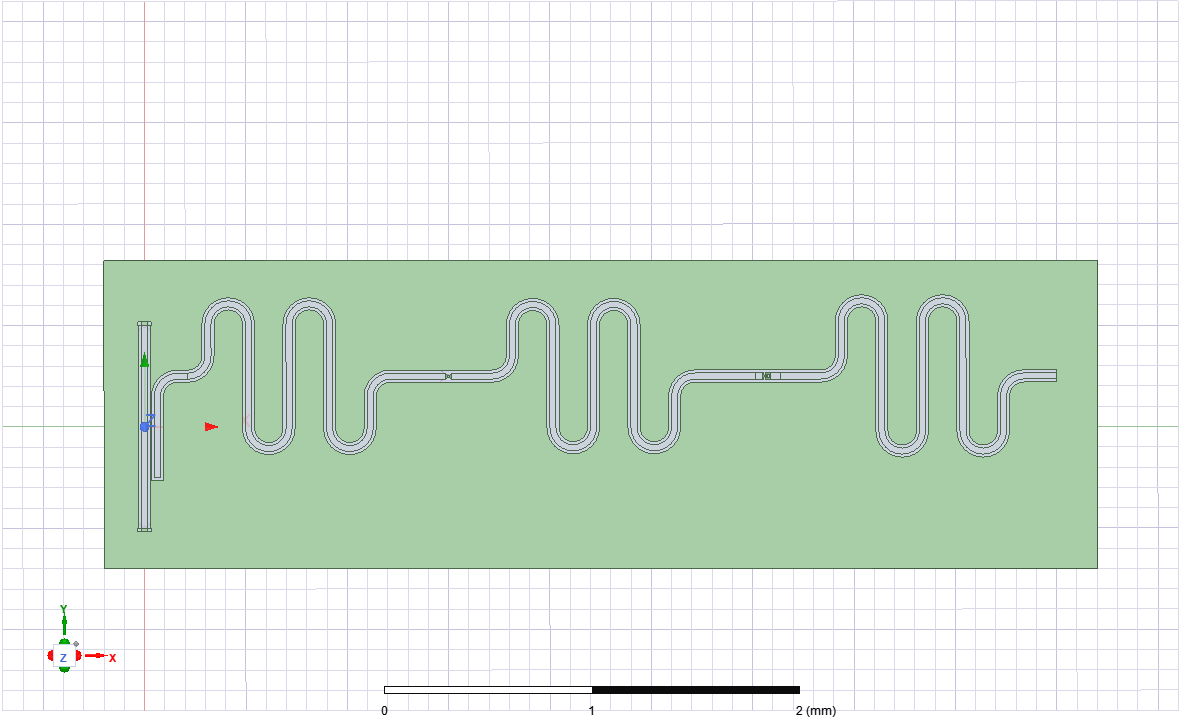

Design "quarterwave_sim_hfss" info:
	# eigenmodes    2
	# variations    1
Design "quarterwave_sim_hfss" info:
	# eigenmodes    2
	# variations    1
freq = 6.63 GHz
Q = 5667.9
kappa = 1000.0 MHz
{'pos_x': '0.0um', 'pos_y': '0.0um', 'orientation': '90', 'chip': 'main', 'layer': '1', 'prime_width': '30um', 'prime_gap': '15um', 'second_width': '30um', 'second_gap': '15um', 'coupling_space': '3um', 'coupling_length': '500um', 'down_length': '150um', 'fillet': '99.9um', 'mirror': False, 'open_termination': True, 'hfss_wire_bonds': False, 'q3d_wire_bonds': False, 'aedt_q3d_wire_bonds': False, 'aedt_hfss_wire_bonds': False}


INFO 05:27AM [connect_project]: Connecting to Ansys Desktop API...
INFO 05:27AM [load_ansys_project]: 	Opened Ansys App
INFO 05:27AM [load_ansys_project]: 	Opened Ansys Desktop v2021.1.0
INFO 05:27AM [load_ansys_project]: 	Opened Ansys Project
	Folder:    D:/andre/PHYS408_finalproj/tcap/src/
	Project:   Tunable_capacitor-qubits-single-value


Starting the Simulation


INFO 05:27AM [connect_design]: 	Opened active design
	Design:    quarterwave_sim_hfss [Solution type: Eigenmode]
INFO 05:27AM [get_setup]: 	Opened setup `test_setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 05:27AM [connect]: 	Connected to project "Tunable_capacitor-qubits-single-value" and design "quarterwave_sim_hfss" 😀 

INFO 05:27AM [connect_design]: 	Opened active design
	Design:    CavitySweep57 [Solution type: Eigenmode]
WARNING 05:27AM [connect_setup]: 	No design setup detected.
WARNING 05:27AM [connect_setup]: 	Creating eigenmode default setup.
INFO 05:27AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


the parameters ['min_converged_passes'] are unsupported, so they have been ignored


INFO 05:27AM [connect_design]: 	Opened active design
	Design:    quarterwave_sim_hfss [Solution type: Eigenmode]


pyaedt INFO: using existing logger.


INFO:Global:using existing logger.


pyaedt INFO: Launching PyAEDT outside AEDT with CPython and PythonNET.


INFO:Global:Launching PyAEDT outside AEDT with CPython and PythonNET.


pyaedt INFO: AEDT installation Path C:\Program Files\AnsysEM\AnsysEM21.1\Win64.


INFO:Global:AEDT installation Path C:\Program Files\AnsysEM\AnsysEM21.1\Win64.


pyaedt INFO: Launching AEDT with module PythonNET.


INFO:Global:Launching AEDT with module PythonNET.


pyaedt WARNING: PyAEDT is not supported in AEDT versions earlier than 2021 R2. Trying to launch PyAEDT with PyWin32.


pyaedt INFO: pyaedt v0.6.46


INFO:Global:pyaedt v0.6.46


pyaedt INFO: Python version 3.11.3 | packaged by conda-forge | (main, Apr  6 2023, 08:50:54) [MSC v.1934 64 bit (AMD64)]


INFO:Global:Python version 3.11.3 | packaged by conda-forge | (main, Apr  6 2023, 08:50:54) [MSC v.1934 64 bit (AMD64)]


pyaedt INFO: Project Tunable_capacitor-qubits-single-value set to active.


INFO:Global:Project Tunable_capacitor-qubits-single-value set to active.


pyaedt INFO: Aedt Objects initialized


INFO:Global:Aedt Objects initialized


pyaedt INFO: Variable Manager initialized


INFO:Global:Variable Manager initialized


pyaedt INFO: Design Loaded


INFO:Global:Design Loaded


pyaedt INFO: Successfully loaded project materials !


INFO:Global:Successfully loaded project materials !


pyaedt INFO: Materials Loaded


INFO:Global:Materials Loaded


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2775, in _refresh_planes


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2775, in _refresh_planes


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _refresh_planes -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _refresh_planes -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:28:21 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:28:21 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_refresh_planes


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_refresh_planes


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2775, in _refresh_planes


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2775, in _refresh_planes


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _refresh_planes -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _refresh_planes -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:28:21 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:28:21 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_refresh_planes


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_refresh_planes


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:28:21 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:28:21 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = main 


ERROR:Global:    name = main 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:28:21 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:28:21 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = sample_holder 


ERROR:Global:    name = sample_holder 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:28:21 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:28:21 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = prime_cpw_clt1 


ERROR:Global:    name = prime_cpw_clt1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:28:21 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:28:21 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = second_cpw_clt1 


ERROR:Global:    name = second_cpw_clt1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:28:21 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:28:21 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = trace_cpw1 


ERROR:Global:    name = trace_cpw1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:28:21 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:28:21 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = second_cpw_top_inline1 


ERROR:Global:    name = second_cpw_top_inline1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:28:21 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:28:21 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = second_cpw_bottom_inline1 


ERROR:Global:    name = second_cpw_bottom_inline1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:28:21 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:28:21 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = trace_cpw2 


ERROR:Global:    name = trace_cpw2 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:28:21 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:28:21 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = trace_cpw3 


ERROR:Global:    name = trace_cpw3 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:28:21 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:28:21 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = banks_0_jjr1 


ERROR:Global:    name = banks_0_jjr1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:28:21 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:28:21 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = banks_1_jjr1 


ERROR:Global:    name = banks_1_jjr1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:28:21 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:28:21 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = cap_body_0_inline1 


ERROR:Global:    name = cap_body_0_inline1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:28:21 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:28:21 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = cap_body_1_inline1 


ERROR:Global:    name = cap_body_1_inline1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:28:21 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:28:21 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = JJ_rect_Lj_jjr1_rect_jj 


ERROR:Global:    name = JJ_rect_Lj_jjr1_rect_jj 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:28:21 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:28:21 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = endcap_clt1_prime_start_1 


ERROR:Global:    name = endcap_clt1_prime_start_1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:28:21 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:28:21 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = endcap_clt1_prime_end_1 


ERROR:Global:    name = endcap_clt1_prime_end_1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:28:21 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:28:21 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = ground_main_plane 


ERROR:Global:    name = ground_main_plane 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:28:21 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:28:21 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = Port_clt1_prime_start 


ERROR:Global:    name = Port_clt1_prime_start 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:28:21 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:28:21 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = Port_clt1_prime_end 


ERROR:Global:    name = Port_clt1_prime_end 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:28:21 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:28:21 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = JJ_Lj_jjr1_rect_jj_ 


ERROR:Global:    name = JJ_Lj_jjr1_rect_jj_ 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:28:21 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:28:21 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = voltage_line_Port_clt1_prime_start 


ERROR:Global:    name = voltage_line_Port_clt1_prime_start 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:28:21 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:28:21 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = voltage_line_Port_clt1_prime_end 


ERROR:Global:    name = voltage_line_Port_clt1_prime_end 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2775, in _refresh_planes


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2775, in _refresh_planes


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _refresh_planes -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _refresh_planes -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:28:21 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:28:21 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_refresh_planes


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_refresh_planes


pyaedt INFO: Project files removed from handlers.


INFO:Global:Project files removed from handlers.
INFO 05:28AM [__del__]: Disconnected from Ansys HFSS
INFO 05:28AM [get_setup]: 	Opened setup `test_setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 05:28AM [analyze]: Analyzing setup test_setup
05:32AM 24s INFO [get_f_convergence]: Saved convergences to d:\andre\PHYS408_finalproj\hfss_eig_f_convergence.csv


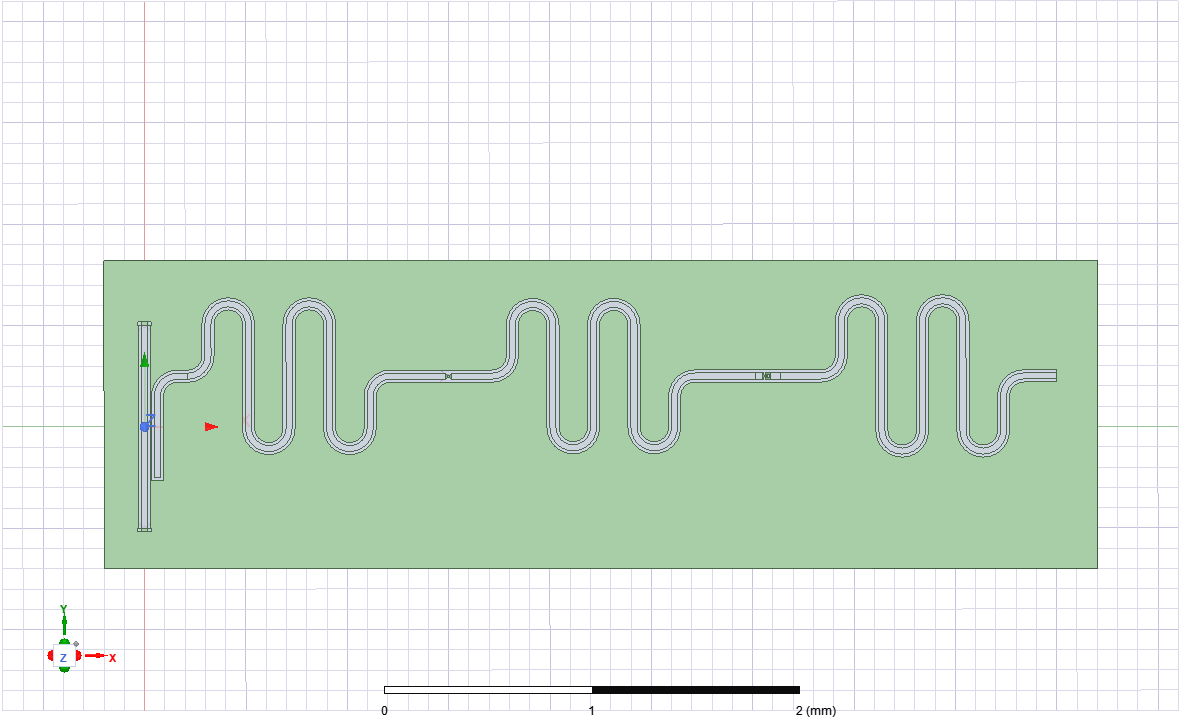

Design "quarterwave_sim_hfss" info:
	# eigenmodes    2
	# variations    1
Design "quarterwave_sim_hfss" info:
	# eigenmodes    2
	# variations    1
freq = 6.534 GHz
Q = 5986.8
kappa = 1000.0 MHz
{'pos_x': '0.0um', 'pos_y': '0.0um', 'orientation': '90', 'chip': 'main', 'layer': '1', 'prime_width': '30um', 'prime_gap': '15um', 'second_width': '30um', 'second_gap': '15um', 'coupling_space': '3um', 'coupling_length': '500um', 'down_length': '150um', 'fillet': '99.9um', 'mirror': False, 'open_termination': True, 'hfss_wire_bonds': False, 'q3d_wire_bonds': False, 'aedt_q3d_wire_bonds': False, 'aedt_hfss_wire_bonds': False}


INFO 05:32AM [connect_project]: Connecting to Ansys Desktop API...
INFO 05:32AM [load_ansys_project]: 	Opened Ansys App
INFO 05:32AM [load_ansys_project]: 	Opened Ansys Desktop v2021.1.0
INFO 05:32AM [load_ansys_project]: 	Opened Ansys Project
	Folder:    D:/andre/PHYS408_finalproj/tcap/src/
	Project:   Tunable_capacitor-qubits-single-value


Starting the Simulation


INFO 05:32AM [connect_design]: 	Opened active design
	Design:    quarterwave_sim_hfss [Solution type: Eigenmode]
INFO 05:32AM [get_setup]: 	Opened setup `test_setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 05:32AM [connect]: 	Connected to project "Tunable_capacitor-qubits-single-value" and design "quarterwave_sim_hfss" 😀 

INFO 05:32AM [connect_design]: 	Opened active design
	Design:    CavitySweep58 [Solution type: Eigenmode]
WARNING 05:32AM [connect_setup]: 	No design setup detected.
WARNING 05:32AM [connect_setup]: 	Creating eigenmode default setup.
INFO 05:32AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


the parameters ['min_converged_passes'] are unsupported, so they have been ignored


INFO 05:32AM [connect_design]: 	Opened active design
	Design:    quarterwave_sim_hfss [Solution type: Eigenmode]


pyaedt INFO: using existing logger.


INFO:Global:using existing logger.


pyaedt INFO: Launching PyAEDT outside AEDT with CPython and PythonNET.


INFO:Global:Launching PyAEDT outside AEDT with CPython and PythonNET.


pyaedt INFO: AEDT installation Path C:\Program Files\AnsysEM\AnsysEM21.1\Win64.


INFO:Global:AEDT installation Path C:\Program Files\AnsysEM\AnsysEM21.1\Win64.


pyaedt INFO: Launching AEDT with module PythonNET.


INFO:Global:Launching AEDT with module PythonNET.


pyaedt WARNING: PyAEDT is not supported in AEDT versions earlier than 2021 R2. Trying to launch PyAEDT with PyWin32.


pyaedt INFO: pyaedt v0.6.46


INFO:Global:pyaedt v0.6.46


pyaedt INFO: Python version 3.11.3 | packaged by conda-forge | (main, Apr  6 2023, 08:50:54) [MSC v.1934 64 bit (AMD64)]


INFO:Global:Python version 3.11.3 | packaged by conda-forge | (main, Apr  6 2023, 08:50:54) [MSC v.1934 64 bit (AMD64)]


pyaedt INFO: Project Tunable_capacitor-qubits-single-value set to active.


INFO:Global:Project Tunable_capacitor-qubits-single-value set to active.


pyaedt INFO: Aedt Objects initialized


INFO:Global:Aedt Objects initialized


pyaedt INFO: Variable Manager initialized


INFO:Global:Variable Manager initialized


pyaedt INFO: Design Loaded


INFO:Global:Design Loaded


pyaedt INFO: Successfully loaded project materials !


INFO:Global:Successfully loaded project materials !


pyaedt INFO: Materials Loaded


INFO:Global:Materials Loaded


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2775, in _refresh_planes


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2775, in _refresh_planes


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _refresh_planes -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _refresh_planes -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:33:33 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:33:33 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_refresh_planes


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_refresh_planes


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2775, in _refresh_planes


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2775, in _refresh_planes


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _refresh_planes -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _refresh_planes -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:33:34 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:33:34 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_refresh_planes


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_refresh_planes


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:33:34 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:33:34 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = main 


ERROR:Global:    name = main 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:33:34 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:33:34 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = sample_holder 


ERROR:Global:    name = sample_holder 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:33:34 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:33:34 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = prime_cpw_clt1 


ERROR:Global:    name = prime_cpw_clt1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:33:34 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:33:34 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = second_cpw_clt1 


ERROR:Global:    name = second_cpw_clt1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:33:34 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:33:34 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = trace_cpw1 


ERROR:Global:    name = trace_cpw1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:33:34 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:33:34 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = second_cpw_top_inline1 


ERROR:Global:    name = second_cpw_top_inline1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:33:34 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:33:34 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = second_cpw_bottom_inline1 


ERROR:Global:    name = second_cpw_bottom_inline1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:33:34 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:33:34 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = trace_cpw2 


ERROR:Global:    name = trace_cpw2 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:33:34 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:33:34 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = trace_cpw3 


ERROR:Global:    name = trace_cpw3 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:33:34 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:33:34 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = banks_0_jjr1 


ERROR:Global:    name = banks_0_jjr1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:33:34 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:33:34 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = banks_1_jjr1 


ERROR:Global:    name = banks_1_jjr1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:33:34 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:33:34 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = cap_body_0_inline1 


ERROR:Global:    name = cap_body_0_inline1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:33:34 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:33:34 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = cap_body_1_inline1 


ERROR:Global:    name = cap_body_1_inline1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:33:34 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:33:34 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = JJ_rect_Lj_jjr1_rect_jj 


ERROR:Global:    name = JJ_rect_Lj_jjr1_rect_jj 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:33:34 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:33:34 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = endcap_clt1_prime_start_1 


ERROR:Global:    name = endcap_clt1_prime_start_1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:33:34 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:33:34 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = endcap_clt1_prime_end_1 


ERROR:Global:    name = endcap_clt1_prime_end_1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:33:34 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:33:34 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = ground_main_plane 


ERROR:Global:    name = ground_main_plane 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:33:34 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:33:34 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = Port_clt1_prime_start 


ERROR:Global:    name = Port_clt1_prime_start 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:33:34 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:33:34 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = Port_clt1_prime_end 


ERROR:Global:    name = Port_clt1_prime_end 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:33:34 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:33:34 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = JJ_Lj_jjr1_rect_jj_ 


ERROR:Global:    name = JJ_Lj_jjr1_rect_jj_ 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:33:34 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:33:34 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = voltage_line_Port_clt1_prime_start 


ERROR:Global:    name = voltage_line_Port_clt1_prime_start 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:33:34 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:33:34 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = voltage_line_Port_clt1_prime_end 


ERROR:Global:    name = voltage_line_Port_clt1_prime_end 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2775, in _refresh_planes


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2775, in _refresh_planes


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _refresh_planes -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _refresh_planes -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:33:34 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:33:34 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_refresh_planes


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_refresh_planes


pyaedt INFO: Project files removed from handlers.


INFO:Global:Project files removed from handlers.
INFO 05:33AM [__del__]: Disconnected from Ansys HFSS
INFO 05:33AM [get_setup]: 	Opened setup `test_setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 05:33AM [analyze]: Analyzing setup test_setup
05:39AM 00s INFO [get_f_convergence]: Saved convergences to d:\andre\PHYS408_finalproj\hfss_eig_f_convergence.csv


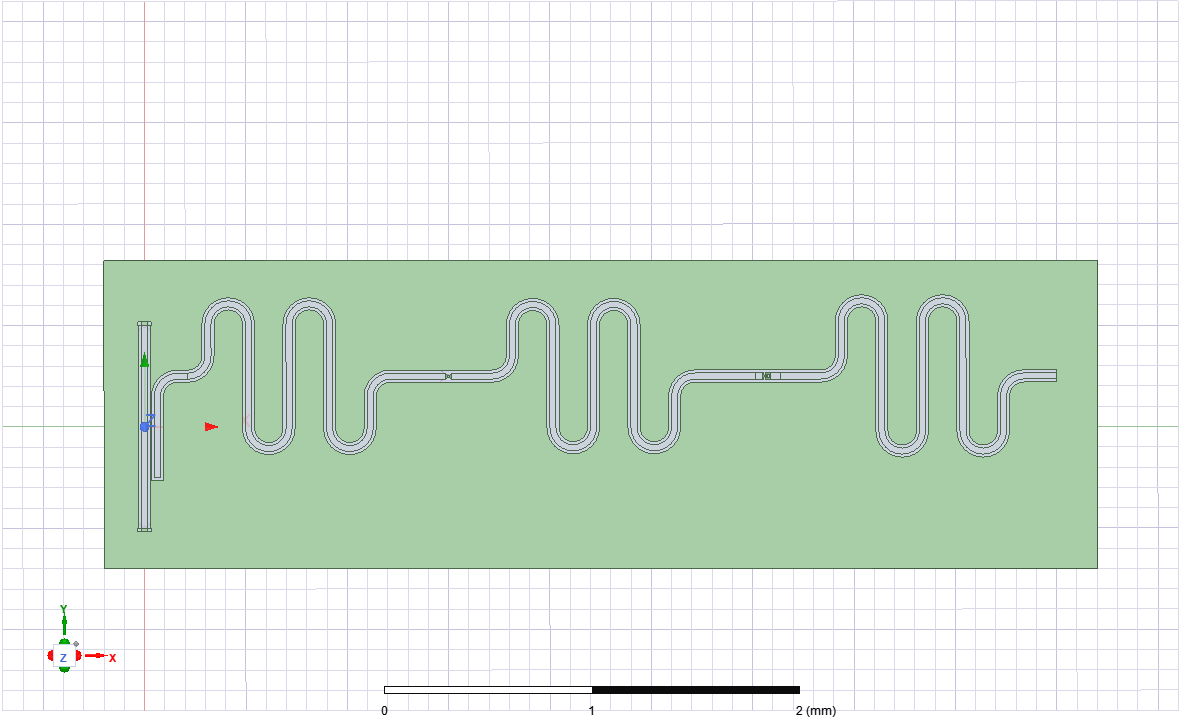

Design "quarterwave_sim_hfss" info:
	# eigenmodes    2
	# variations    1
Design "quarterwave_sim_hfss" info:
	# eigenmodes    2
	# variations    1
freq = 6.454 GHz
Q = 6003.1
kappa = 1000.0 MHz
{'pos_x': '0.0um', 'pos_y': '0.0um', 'orientation': '90', 'chip': 'main', 'layer': '1', 'prime_width': '30um', 'prime_gap': '15um', 'second_width': '30um', 'second_gap': '15um', 'coupling_space': '3um', 'coupling_length': '500um', 'down_length': '150um', 'fillet': '99.9um', 'mirror': False, 'open_termination': True, 'hfss_wire_bonds': False, 'q3d_wire_bonds': False, 'aedt_q3d_wire_bonds': False, 'aedt_hfss_wire_bonds': False}


05:39AM 05s CRITICAL [_qt_message_handler]: line: 0, func: None(), file: None  CRITICAL: QEventDispatcherWin32::wakeUp: Failed to post a message (Not enough quota is available to process this command.)

INFO 05:39AM [connect_project]: Connecting to Ansys Desktop API...
INFO 05:39AM [load_ansys_project]: 	Opened Ansys App
INFO 05:39AM [load_ansys_project]: 	Opened Ansys Desktop v2021.1.0
INFO 05:39AM [load_ansys_project]: 	Opened Ansys Project
	Folder:    D:/andre/PHYS408_finalproj/tcap/src/
	Project:   Tunable_capacitor-qubits-single-value


Starting the Simulation


INFO 05:39AM [connect_design]: 	Opened active design
	Design:    quarterwave_sim_hfss [Solution type: Eigenmode]
INFO 05:39AM [get_setup]: 	Opened setup `test_setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 05:39AM [connect]: 	Connected to project "Tunable_capacitor-qubits-single-value" and design "quarterwave_sim_hfss" 😀 

INFO 05:39AM [connect_design]: 	Opened active design
	Design:    CavitySweep59 [Solution type: Eigenmode]
WARNING 05:39AM [connect_setup]: 	No design setup detected.
WARNING 05:39AM [connect_setup]: 	Creating eigenmode default setup.
INFO 05:39AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


the parameters ['min_converged_passes'] are unsupported, so they have been ignored


INFO 05:39AM [connect_design]: 	Opened active design
	Design:    quarterwave_sim_hfss [Solution type: Eigenmode]


pyaedt INFO: using existing logger.


INFO:Global:using existing logger.


pyaedt INFO: Launching PyAEDT outside AEDT with CPython and PythonNET.


INFO:Global:Launching PyAEDT outside AEDT with CPython and PythonNET.


pyaedt INFO: AEDT installation Path C:\Program Files\AnsysEM\AnsysEM21.1\Win64.


INFO:Global:AEDT installation Path C:\Program Files\AnsysEM\AnsysEM21.1\Win64.


pyaedt INFO: Launching AEDT with module PythonNET.


INFO:Global:Launching AEDT with module PythonNET.


pyaedt WARNING: PyAEDT is not supported in AEDT versions earlier than 2021 R2. Trying to launch PyAEDT with PyWin32.


pyaedt INFO: pyaedt v0.6.46


INFO:Global:pyaedt v0.6.46


pyaedt INFO: Python version 3.11.3 | packaged by conda-forge | (main, Apr  6 2023, 08:50:54) [MSC v.1934 64 bit (AMD64)]


INFO:Global:Python version 3.11.3 | packaged by conda-forge | (main, Apr  6 2023, 08:50:54) [MSC v.1934 64 bit (AMD64)]


pyaedt INFO: Project Tunable_capacitor-qubits-single-value set to active.


INFO:Global:Project Tunable_capacitor-qubits-single-value set to active.


pyaedt INFO: Aedt Objects initialized


INFO:Global:Aedt Objects initialized


pyaedt INFO: Variable Manager initialized


INFO:Global:Variable Manager initialized


pyaedt INFO: Design Loaded


INFO:Global:Design Loaded


pyaedt INFO: Successfully loaded project materials !


INFO:Global:Successfully loaded project materials !


pyaedt INFO: Materials Loaded


INFO:Global:Materials Loaded


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2775, in _refresh_planes


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2775, in _refresh_planes


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _refresh_planes -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _refresh_planes -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:40:06 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:40:06 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_refresh_planes


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_refresh_planes


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2775, in _refresh_planes


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2775, in _refresh_planes


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _refresh_planes -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _refresh_planes -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:40:06 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:40:06 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_refresh_planes


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_refresh_planes


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:40:07 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:40:07 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = main 


ERROR:Global:    name = main 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:40:07 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:40:07 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = sample_holder 


ERROR:Global:    name = sample_holder 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:40:07 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:40:07 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = prime_cpw_clt1 


ERROR:Global:    name = prime_cpw_clt1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:40:07 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:40:07 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = second_cpw_clt1 


ERROR:Global:    name = second_cpw_clt1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:40:07 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:40:07 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = trace_cpw1 


ERROR:Global:    name = trace_cpw1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:40:07 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:40:07 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = second_cpw_top_inline1 


ERROR:Global:    name = second_cpw_top_inline1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:40:07 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:40:07 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = second_cpw_bottom_inline1 


ERROR:Global:    name = second_cpw_bottom_inline1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:40:07 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:40:07 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = trace_cpw2 


ERROR:Global:    name = trace_cpw2 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:40:07 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:40:07 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = trace_cpw3 


ERROR:Global:    name = trace_cpw3 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:40:07 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:40:07 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = banks_0_jjr1 


ERROR:Global:    name = banks_0_jjr1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:40:07 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:40:07 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = banks_1_jjr1 


ERROR:Global:    name = banks_1_jjr1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:40:07 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:40:07 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = cap_body_0_inline1 


ERROR:Global:    name = cap_body_0_inline1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:40:07 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:40:07 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = cap_body_1_inline1 


ERROR:Global:    name = cap_body_1_inline1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:40:07 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:40:07 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = JJ_rect_Lj_jjr1_rect_jj 


ERROR:Global:    name = JJ_rect_Lj_jjr1_rect_jj 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:40:07 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:40:07 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = endcap_clt1_prime_start_1 


ERROR:Global:    name = endcap_clt1_prime_start_1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:40:07 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:40:07 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = endcap_clt1_prime_end_1 


ERROR:Global:    name = endcap_clt1_prime_end_1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:40:07 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:40:07 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = ground_main_plane 


ERROR:Global:    name = ground_main_plane 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:40:07 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:40:07 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = Port_clt1_prime_start 


ERROR:Global:    name = Port_clt1_prime_start 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:40:07 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:40:07 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = Port_clt1_prime_end 


ERROR:Global:    name = Port_clt1_prime_end 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:40:07 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:40:07 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = JJ_Lj_jjr1_rect_jj_ 


ERROR:Global:    name = JJ_Lj_jjr1_rect_jj_ 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:40:07 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:40:07 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = voltage_line_Port_clt1_prime_start 


ERROR:Global:    name = voltage_line_Port_clt1_prime_start 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:40:07 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:40:07 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = voltage_line_Port_clt1_prime_end 


ERROR:Global:    name = voltage_line_Port_clt1_prime_end 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2775, in _refresh_planes


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2775, in _refresh_planes


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _refresh_planes -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _refresh_planes -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:40:07 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:40:07 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_refresh_planes


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_refresh_planes


pyaedt INFO: Project files removed from handlers.


INFO:Global:Project files removed from handlers.
INFO 05:40AM [__del__]: Disconnected from Ansys HFSS
INFO 05:40AM [get_setup]: 	Opened setup `test_setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 05:40AM [analyze]: Analyzing setup test_setup
05:45AM 39s INFO [get_f_convergence]: Saved convergences to d:\andre\PHYS408_finalproj\hfss_eig_f_convergence.csv


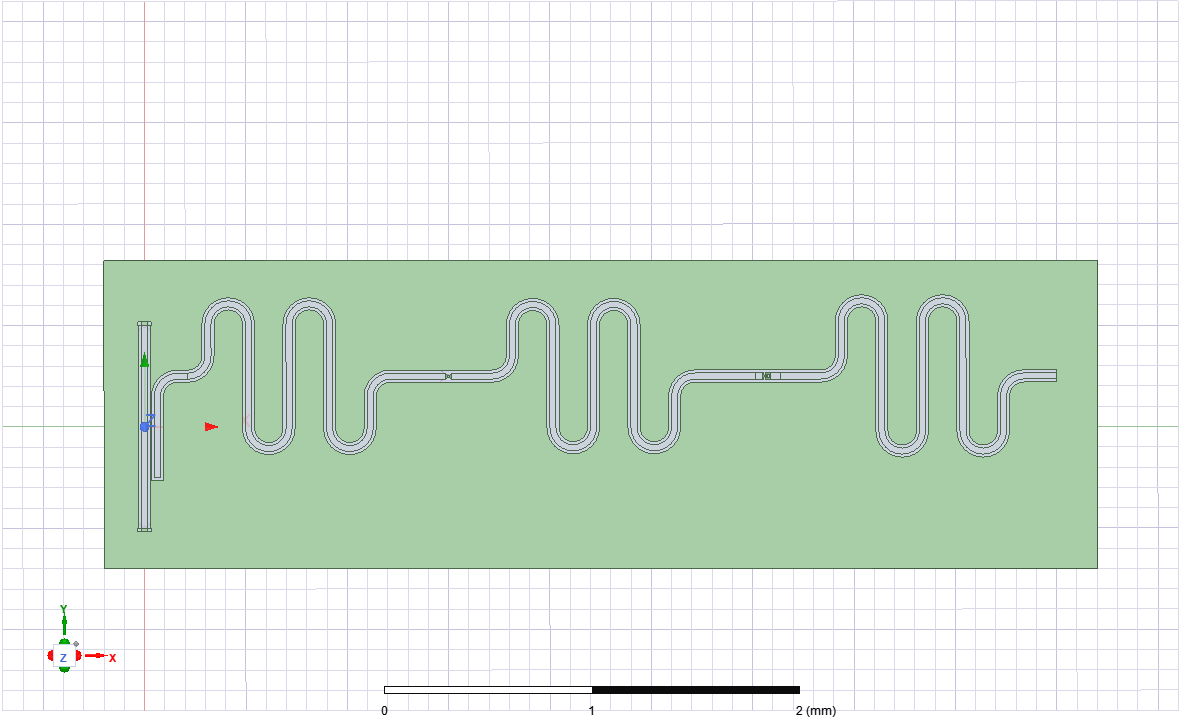

Design "quarterwave_sim_hfss" info:
	# eigenmodes    2
	# variations    1
Design "quarterwave_sim_hfss" info:
	# eigenmodes    2
	# variations    1
freq = 6.368 GHz
Q = 5942.7
kappa = 1000.0 MHz
{'pos_x': '0.0um', 'pos_y': '0.0um', 'orientation': '90', 'chip': 'main', 'layer': '1', 'prime_width': '30um', 'prime_gap': '15um', 'second_width': '30um', 'second_gap': '15um', 'coupling_space': '3um', 'coupling_length': '500um', 'down_length': '150um', 'fillet': '99.9um', 'mirror': False, 'open_termination': True, 'hfss_wire_bonds': False, 'q3d_wire_bonds': False, 'aedt_q3d_wire_bonds': False, 'aedt_hfss_wire_bonds': False}


INFO 05:45AM [connect_project]: Connecting to Ansys Desktop API...
INFO 05:45AM [load_ansys_project]: 	Opened Ansys App
INFO 05:45AM [load_ansys_project]: 	Opened Ansys Desktop v2021.1.0
INFO 05:45AM [load_ansys_project]: 	Opened Ansys Project
	Folder:    D:/andre/PHYS408_finalproj/tcap/src/
	Project:   Tunable_capacitor-qubits-single-value


Starting the Simulation


INFO 05:45AM [connect_design]: 	Opened active design
	Design:    quarterwave_sim_hfss [Solution type: Eigenmode]
INFO 05:45AM [get_setup]: 	Opened setup `test_setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 05:45AM [connect]: 	Connected to project "Tunable_capacitor-qubits-single-value" and design "quarterwave_sim_hfss" 😀 

INFO 05:45AM [connect_design]: 	Opened active design
	Design:    CavitySweep60 [Solution type: Eigenmode]
WARNING 05:45AM [connect_setup]: 	No design setup detected.
WARNING 05:45AM [connect_setup]: 	Creating eigenmode default setup.
INFO 05:45AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


the parameters ['min_converged_passes'] are unsupported, so they have been ignored


INFO 05:45AM [connect_design]: 	Opened active design
	Design:    quarterwave_sim_hfss [Solution type: Eigenmode]


pyaedt INFO: using existing logger.


INFO:Global:using existing logger.


pyaedt INFO: Launching PyAEDT outside AEDT with CPython and PythonNET.


INFO:Global:Launching PyAEDT outside AEDT with CPython and PythonNET.


pyaedt INFO: AEDT installation Path C:\Program Files\AnsysEM\AnsysEM21.1\Win64.


INFO:Global:AEDT installation Path C:\Program Files\AnsysEM\AnsysEM21.1\Win64.


pyaedt INFO: Launching AEDT with module PythonNET.


INFO:Global:Launching AEDT with module PythonNET.


pyaedt WARNING: PyAEDT is not supported in AEDT versions earlier than 2021 R2. Trying to launch PyAEDT with PyWin32.


pyaedt INFO: pyaedt v0.6.46


INFO:Global:pyaedt v0.6.46


pyaedt INFO: Python version 3.11.3 | packaged by conda-forge | (main, Apr  6 2023, 08:50:54) [MSC v.1934 64 bit (AMD64)]


INFO:Global:Python version 3.11.3 | packaged by conda-forge | (main, Apr  6 2023, 08:50:54) [MSC v.1934 64 bit (AMD64)]


pyaedt INFO: Project Tunable_capacitor-qubits-single-value set to active.


INFO:Global:Project Tunable_capacitor-qubits-single-value set to active.


pyaedt INFO: Aedt Objects initialized


INFO:Global:Aedt Objects initialized


pyaedt INFO: Variable Manager initialized


INFO:Global:Variable Manager initialized


pyaedt INFO: Design Loaded


INFO:Global:Design Loaded


pyaedt INFO: Successfully loaded project materials !


INFO:Global:Successfully loaded project materials !


pyaedt INFO: Materials Loaded


INFO:Global:Materials Loaded


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2775, in _refresh_planes


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2775, in _refresh_planes


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _refresh_planes -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _refresh_planes -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:46:48 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:46:48 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_refresh_planes


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_refresh_planes


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2775, in _refresh_planes


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2775, in _refresh_planes


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _refresh_planes -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _refresh_planes -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:46:48 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:46:48 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_refresh_planes


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_refresh_planes


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:46:49 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:46:49 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = main 


ERROR:Global:    name = main 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:46:49 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:46:49 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = sample_holder 


ERROR:Global:    name = sample_holder 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:46:49 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:46:49 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = prime_cpw_clt1 


ERROR:Global:    name = prime_cpw_clt1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:46:49 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:46:49 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = second_cpw_clt1 


ERROR:Global:    name = second_cpw_clt1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:46:49 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:46:49 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = trace_cpw1 


ERROR:Global:    name = trace_cpw1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:46:49 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:46:49 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = second_cpw_top_inline1 


ERROR:Global:    name = second_cpw_top_inline1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:46:49 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:46:49 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = second_cpw_bottom_inline1 


ERROR:Global:    name = second_cpw_bottom_inline1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:46:49 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:46:49 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = trace_cpw2 


ERROR:Global:    name = trace_cpw2 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:46:49 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:46:49 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = trace_cpw3 


ERROR:Global:    name = trace_cpw3 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:46:49 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:46:49 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = banks_0_jjr1 


ERROR:Global:    name = banks_0_jjr1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:46:49 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:46:49 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = banks_1_jjr1 


ERROR:Global:    name = banks_1_jjr1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:46:49 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:46:49 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = cap_body_0_inline1 


ERROR:Global:    name = cap_body_0_inline1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:46:49 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:46:49 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = cap_body_1_inline1 


ERROR:Global:    name = cap_body_1_inline1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:46:49 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:46:49 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = JJ_rect_Lj_jjr1_rect_jj 


ERROR:Global:    name = JJ_rect_Lj_jjr1_rect_jj 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:46:49 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:46:49 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = endcap_clt1_prime_start_1 


ERROR:Global:    name = endcap_clt1_prime_start_1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:46:49 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:46:49 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = endcap_clt1_prime_end_1 


ERROR:Global:    name = endcap_clt1_prime_end_1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:46:49 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:46:49 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = ground_main_plane 


ERROR:Global:    name = ground_main_plane 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:46:49 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:46:49 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = Port_clt1_prime_start 


ERROR:Global:    name = Port_clt1_prime_start 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:46:49 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:46:49 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = Port_clt1_prime_end 


ERROR:Global:    name = Port_clt1_prime_end 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:46:49 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:46:49 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = JJ_Lj_jjr1_rect_jj_ 


ERROR:Global:    name = JJ_Lj_jjr1_rect_jj_ 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:46:49 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:46:49 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = voltage_line_Port_clt1_prime_start 


ERROR:Global:    name = voltage_line_Port_clt1_prime_start 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:46:49 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:46:49 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = voltage_line_Port_clt1_prime_end 


ERROR:Global:    name = voltage_line_Port_clt1_prime_end 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2775, in _refresh_planes


ERROR:Global:Error in :   File "c:\Users\lfl\AppData\Local\miniconda3\envs\qiskit_metal\Lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2775, in _refresh_planes


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _refresh_planes -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _refresh_planes -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:46:49 AM  Apr 16, 2024)



ERROR:Global:Project: Tunable_capacitor-qubits-single-value, Design: quarterwave_sim_hfss (Eigenmode), [error] Script macro error: testing feature is NOT enabled. (5:46:49 AM  Apr 16, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_refresh_planes


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_refresh_planes


pyaedt INFO: Project files removed from handlers.


INFO:Global:Project files removed from handlers.
INFO 05:46AM [__del__]: Disconnected from Ansys HFSS
INFO 05:46AM [get_setup]: 	Opened setup `test_setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 05:46AM [analyze]: Analyzing setup test_setup
05:52AM 30s INFO [get_f_convergence]: Saved convergences to d:\andre\PHYS408_finalproj\hfss_eig_f_convergence.csv


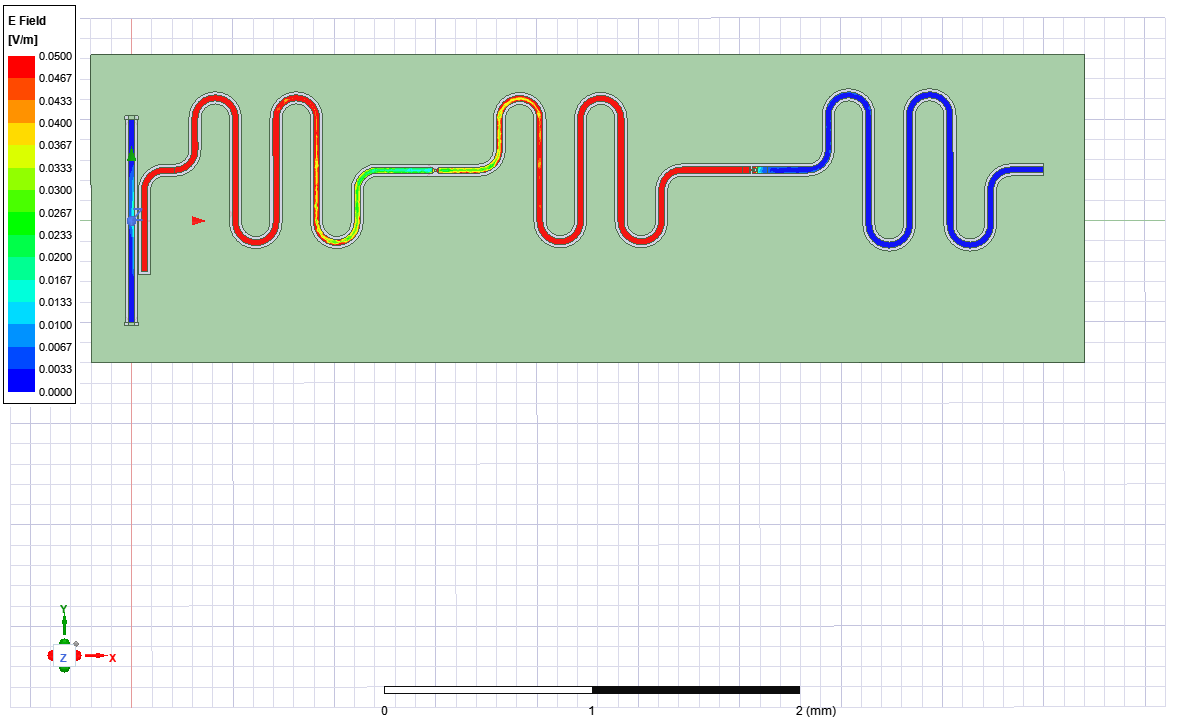

Design "quarterwave_sim_hfss" info:
	# eigenmodes    2
	# variations    1
Design "quarterwave_sim_hfss" info:
	# eigenmodes    2
	# variations    1
freq = 6.283 GHz
Q = 6128.8
kappa = 1000.0 MHz
{'pos_x': '0.0um', 'pos_y': '0.0um', 'orientation': '90', 'chip': 'main', 'layer': '1', 'prime_width': '30um', 'prime_gap': '15um', 'second_width': '30um', 'second_gap': '15um', 'coupling_space': '3um', 'coupling_length': '500um', 'down_length': '150um', 'fillet': '99.9um', 'mirror': False, 'open_termination': True, 'hfss_wire_bonds': False, 'q3d_wire_bonds': False, 'aedt_q3d_wire_bonds': False, 'aedt_hfss_wire_bonds': False}


In [9]:
for i in range(11):
    design.delete_all_components()
    options = Dict(
        orientation = "90",
        open_termination = True,
        coupling_length = "500um",
        prime_width = cpw_width,
        prime_gap = cpw_gap,
        second_width = cpw_width,
        second_gap = cpw_gap,
        fillet = "99.9um",
        down_length = "150um"
    )
    clt1 = CoupledLineTee(design, "clt1", options=options)

    options = Dict(
        pos_x = "1500um",
        pos_y = "250um",
        prime_width = cpw_width,
        prime_gap=cpw_gap,
        hfss_inductance = f'{i*0.05+0.01}nH'
    )
    jjinres1 = JJinRes(design, "jjr1", options=options)

    options = Dict(
        pin_inputs = Dict(
            start_pin = Dict(component = "clt1", pin = "second_end"),
            end_pin = Dict(component = "jjr1", pin = "left_pin")
        ),
        total_length = "3700um",
        fillet = "99.9um",
        trace_width = cpw_width,
        trace_gap = cpw_gap,
        lead = Dict(
            start_straight = "100um"
        )
    )
    cpw1 = RouteMeander(design, "cpw1", options=options)

    options = Dict(
        pos_x = "3000um",
        pos_y = "250um",
        orientation = 90,
        finger_count = 3,
        prime_width = cpw_width,
        prime_gap = cpw_gap,
        second_width = cpw_width,
        second_gap = cpw_gap,
    )
    inline1 = InlineFinger(design, "inline1", options=options)

    options = Dict(
        pin_inputs = Dict(
            start_pin = Dict(component = "jjr1", pin = "right_pin"),
            end_pin = Dict(component = "inline1", pin = "second_start")
        ),
        total_length = "3900um",
        fillet = "99.9um",
        trace_width = cpw_width,
        trace_gap = cpw_gap,
        lead = Dict(
            start_straight = "300um"
        )
    )
    cpw2 = RouteMeander(design, "cpw2", options=options)

    options = Dict(
        pos_x = "4500um",
        pos_y = "250um"
    )
    stg1 = ShortToGround(design, "stg1", options=options)

    options = Dict(
        pin_inputs = Dict(
            start_pin = Dict(component = "inline1", pin = "second_end"),
            end_pin = Dict(component = "stg1", pin = "short")
        ),
        total_length = "3900um",
        fillet = "99.9um",
        trace_width = cpw_width,
        trace_gap = cpw_gap,
        lead = Dict(
            start_straight = "300um"
        )
    )
    cpw3 = RouteMeander(design, "cpw3", options=options)
    gui.rebuild()
    gui.autoscale()
    # clt1.options["hfss_inductance"] = f"{i*0.05 + 0.01}nH"
    # clt1.rebuild()
    # design.rebuild()
    # gui.rebuild()
    config = SimulationConfig(min_converged_passes=3)

    epra, hfss = start_simulation(design, config)
    hfss.clean_active_design()
    # setup = set_simulation_hyperparameters(epra, config)
    epra.sim.setup = Dict(
                name = "Setup",
                reuse_selected_design = True,
                reuse_setup = True,
                min_freq_ghz = 1,
                n_modes = 2,
                max_delta_f = 0.5,
                max_passes = 50,
                min_passes = 1,
                min_converged = 1,
                pct_refinement = 30,
                basis_order = 1,
                vars = Dict(
                    Lj = "0.01nH",
                    Cj = "0fF"
                ),
                min_converged_passes = 2
    )
    epra.sim.setup.name = "test_setup"
    epra.sim.renderer.options.max_mesh_length_port = '7um'
    setup = epra.sim.setup

    epra.sim.renderer.clean_active_design()
    epra.sim._render(   name="quarterwave_sim",
                        solution_type='eigenmode',
                        vars_to_initialize=setup.vars,
                        open_pins=[(clt1.name, "prime_start"), (clt1.name, "prime_end")],
                        port_list=[(clt1.name, 'prime_start', 50), (clt1.name, "prime_end", 50)],
                        box_plus_buffer=True)

    # mesh_lengths = {'mesh1': {"objects": [f"c_connector_arm_{q1.name}", f"prime_cpw_{clt1.name}", f"trace_{cpw1.name}", f"second_cpw_{clt1.name}"], "MaxLength": '7um'}}
    # modeler = hfss.pinfo.design.modeler
        
    #add_ground_strip_and_mesh(modeler, coupler, mesh_lengths=mesh_lengths)
    # print(mesh_lengths)
    # mesh_objects(modeler, mesh_lengths)
    f_rough, Q, kappa = get_freq_Q_kappa(epra, hfss)

    data = epra.get_data()
    f1s += [round(f_rough[0][0]/1e9, 3)]
    f2s += [round(f_rough[1][0]/1e9, 3)]
    Ljs += [i]
    print(clt1.options)

In [1]:
Ljs

NameError: name 'Ljs' is not defined

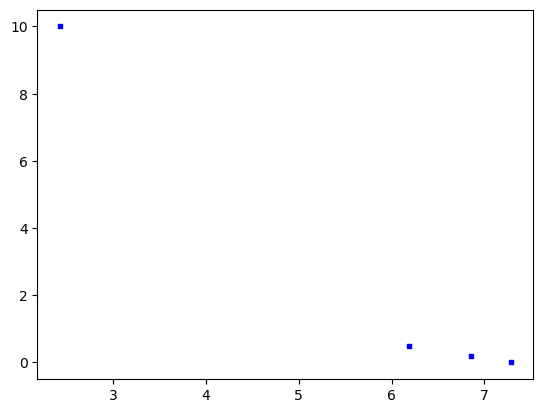

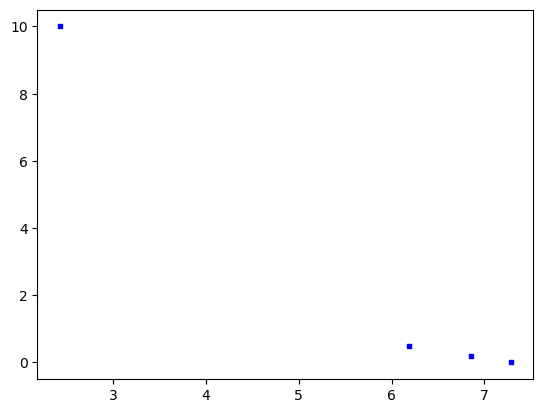

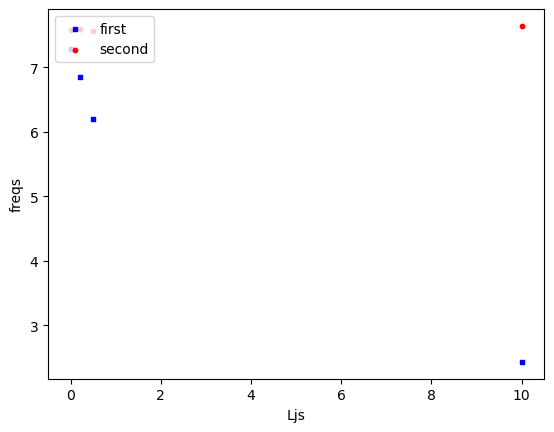

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# f1s = [6.189, 7.285, 6.851]
# f2s = [7.564, 7.582, 7.599]
# Ljs = [0.5, 0, 0.2]

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(Ljs, f1s, s=10, c='b', marker="s", label='first')
ax1.scatter(Ljs, f2s, s=10, c='r', marker="o", label='second')
plt.legend(loc='upper left')

ax1.set_xlabel("Ljs")
ax1.set_ylabel("freqs")

plt.show()